# Telecom Churn Project
> In this notebook, we're going to go through a machine learning project with the goal of predicting how many customers churned in telecom industry.

# 1. Telecom Churn Description
> Churn rate or attrition rate is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.
> Churn rate is an input into customer lifetime value modelling and part of a simulator used to measure return on marketing investment using marketing mix modelling
https://en.wikipedia.org/wiki/Churn_rate
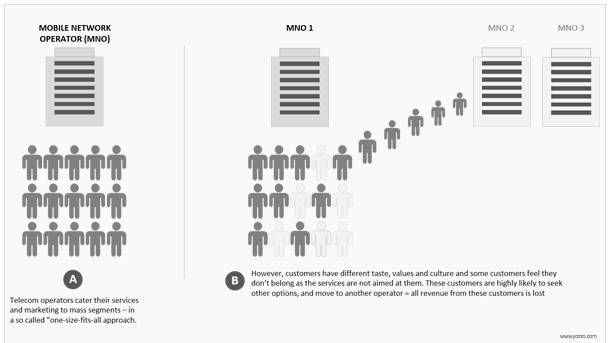

# 2. Business Case
> No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business. Due to new players in the
market, telecom industry has become very competitive and retaining customers becoming a challenge.
In spite of No-Churn initiatives of reducing tariffs and promoting more offers, the churn rate (percentage of customers migrating to competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry.


# 3. Project Goal
> Help No-Churn with their use cases with ML
1. Understanding the variables that are influencing the customers to migrate.
2. Creating Churn risk scores that can be indicative to drive retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.

> Help to identify possible CHURN-FLAG YES customers and provide more attention in customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority for quick resolutions any questions they may have etc.

# 4. Data

DataBase Details:
SQL database
DB Name: project_telecom
Table Name: telecom_churn_data
Host: 18.136.56.185
Username: dm_team3
Password: dm_team15119#

Meta Info of Data
> State : Name of the state

> Account Length : How long the account of customer has been active

> Area Code : std code of a particular area

> Phone : Telephone number of the customer

> International Plan : International roaming pack activated by the customer

> VMail Plan : Voice Mail plan activated by the customer

> VMail Message : Total number of voice mail messages

> Day Mins : Total minutes spent on the call during the day time

> Day Calls : Total calls done in the day time

> Day Charge : Total charge in day

> Eve Mins : Total minutes spent on the call during the evening time

> Eve Calls : Total calls done in the evening time

> Eve Charge : Total charge in evening

> Night Mins : Total minutes spent on the call during the night

> Night Calls : Total calls done in the night time

> Night Charge : Total charge in night

> International Mins : Total minutes spent on the international call

> International calls : Total calls done to a people at international location

> International Charge : Total international charge

> CustServ Calls : Number of customer service calls made

> Churn : the annual percentage rate at which customers stop subscribing to a service

# 5. Features

> The features of the datasets were provided by ***DataMites*** company.


# 6. Assumptions
> 1. Dropped the column phone as it is not required for predicting churn

> 2. Created new fields like Per_Day_Call, Per_Day_Mins, Per_Day_Charge based on Day,Evening and Night calls, minutes and charge.

> 3. Used Churn as a target variable.

> 4. Created a new variable called Churn Flag based on Churn: True(1) , False(0)

> 5. Removed outliers for the fields like 'VMail_Message','Day_Calls','Day_Mins','Day_Charge', 'Eve_Calls','Eve_Mins','Eve_Charge','Area_Code','Acount_Length',Night_Calls','Night_Mins','Night_Charge','International_Calls','International_Mins','International_Charge','CustServ_Calls'

# Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot

# Load the dataset

In [2]:
data=pd.read_excel("telecom_churn_data.xlsx")
data

,Unnamed: 0,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,4612,NY,57,510,345-7512,no,yes,25,144.0,81,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,4613,NM,177,408,343-6820,no,yes,29,189.0,91,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,4614,VT,67,408,338-4794,no,yes,33,127.5,126,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,4615,MI,98,415,355-8388,no,yes,23,168.9,98,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


# Perform Exploratory Data Analysis(EDA)

In [3]:
data.index

RangeIndex(start=0, stop=4617, step=1)

In [4]:
data.columns

Index(['Unnamed: 0', 'columns1', 'columns2', 'columns3', 'columns4',
       'columns5', 'columns6', 'columns7', 'columns8', 'columns9', 'columns10',
       'columns11', 'columns12', 'columns13', 'columns14', 'columns15',
       'columns16', 'columns17', 'columns18', 'columns19', 'columns20',
       'columns21'],
      dtype='object')

In [5]:
data.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [6]:
data.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Rename the columns

In [7]:
data.rename(columns={'columns1':'State',
             'columns2':'Account_Length',
             'columns3':'Area_Code',
             'columns4':'Phone',
             'columns5':'International_Plan',
             'columns6':'VMail_Plan',
             'columns7':'VMail_Message',
             'columns8':'Day_Mins',
             'columns9':'Day_Calls',
             'columns10':'Day_Charge',
             'columns11':'Eve_Mins',
             'columns12':'Eve_Calls',
             'columns13':'Eve_Charge',
             'columns14':'Night_Mins',
             'columns15':'Night_Calls',
             'columns16':'Night_Charge',
             'columns17':'International_Mins',
             'columns18':'International_Calls',
             'columns19':'International_Charge',
             'columns20':'CustServ_Calls',
             'columns21':'Churn'},inplace=True)

In [8]:
data.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
data.dtypes

State                    object
Account_Length            int64
Area_Code                 int64
Phone                    object
International_Plan       object
VMail_Plan               object
VMail_Message             int64
Day_Mins                float64
Day_Calls                 int64
Day_Charge              float64
Eve_Mins                float64
Eve_Calls                 int64
Eve_Charge              float64
Night_Mins              float64
Night_Calls               int64
Night_Charge            float64
International_Mins      float64
International_Calls       int64
International_Charge    float64
CustServ_Calls            int64
Churn                    object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International_Plan    4617 non-null   object 
 5   VMail_Plan            4617 non-null   object 
 6   VMail_Message         4617 non-null   int64  
 7   Day_Mins              4617 non-null   float64
 8   Day_Calls             4617 non-null   int64  
 9   Day_Charge            4617 non-null   float64
 10  Eve_Mins              4617 non-null   float64
 11  Eve_Calls             4617 non-null   int64  
 12  Eve_Charge            4617 non-null   float64
 13  Night_Mins            4617 non-null   float64
 14  Night_Calls           4617 non-null   int64  
 15  Night_Charge         

In [11]:
data.describe()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_Calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
data.shape

(4617, 21)

In [13]:
data.duplicated().sum()

0

In [14]:
pd.get_dummies(data.State,drop_first=False)

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
pd.get_dummies(data.International_Plan,drop_first=False)

,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
4612,1,0
4613,1,0
4614,1,0
4615,1,0


In [16]:
pd.get_dummies(data.VMail_Plan,drop_first=False)

,no,yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
4612,0,1
4613,0,1
4614,0,1
4615,0,1


In [17]:
pd.get_dummies(data.Churn,drop_first=False)

,False.,True.
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
4612,1,0
4613,1,0
4614,1,0
4615,1,0


In [18]:
Counter(data.State)

Counter({'KS': 96,
         'OH': 110,
         'NJ': 106,
         'OK': 80,
         'AL': 114,
         'MA': 97,
         'MO': 84,
         'LA': 73,
         'WV': 149,
         'IN': 89,
         'RI': 90,
         'IA': 65,
         'MT': 92,
         'NY': 109,
         'ID': 110,
         'VT': 95,
         'VA': 109,
         'TX': 105,
         'FL': 85,
         'CO': 91,
         'AZ': 81,
         'SC': 83,
         'NE': 79,
         'WY': 106,
         'HI': 79,
         'IL': 79,
         'NH': 91,
         'GA': 77,
         'AK': 69,
         'MD': 92,
         'AR': 77,
         'WI': 99,
         'OR': 107,
         'MI': 98,
         'DE': 89,
         'UT': 104,
         'CA': 44,
         'MN': 112,
         'SD': 76,
         'NC': 83,
         'WA': 89,
         'NM': 84,
         'NV': 89,
         'DC': 82,
         'KY': 90,
         'ME': 95,
         'MS': 91,
         'TN': 83,
         'PA': 68,
         'CT': 92,
         'ND': 80})

In [19]:
Counter(data.Account_Length)

Counter({128: 29,
         107: 42,
         137: 39,
         84: 33,
         75: 36,
         118: 33,
         121: 38,
         147: 21,
         117: 48,
         141: 29,
         65: 33,
         74: 40,
         168: 6,
         95: 46,
         62: 24,
         161: 23,
         85: 39,
         93: 54,
         76: 38,
         73: 43,
         77: 35,
         130: 40,
         111: 42,
         132: 37,
         174: 11,
         57: 35,
         54: 22,
         20: 4,
         49: 15,
         142: 24,
         172: 9,
         12: 5,
         72: 38,
         36: 18,
         78: 49,
         136: 33,
         149: 27,
         98: 48,
         135: 31,
         34: 8,
         160: 17,
         64: 36,
         59: 27,
         119: 44,
         97: 38,
         52: 25,
         60: 31,
         10: 3,
         96: 37,
         87: 56,
         81: 39,
         68: 40,
         125: 34,
         116: 49,
         38: 11,
         40: 12,
         43: 19,
         113: 

In [20]:
Counter(data.Area_Code)

Counter({415: 2299, 408: 1161, 510: 1157})

In [21]:
Counter(data.International_Plan)

Counter({' no': 4171, ' yes': 446})

In [22]:
Counter(data.VMail_Plan)

Counter({' yes': 1236, ' no': 3381})

In [23]:
Counter(data.VMail_Message)

Counter({25: 49,
         26: 55,
         0: 3381,
         24: 57,
         37: 42,
         27: 57,
         33: 61,
         39: 40,
         30: 54,
         41: 21,
         28: 62,
         34: 39,
         46: 8,
         29: 64,
         35: 40,
         21: 40,
         32: 52,
         42: 19,
         36: 45,
         22: 45,
         23: 48,
         43: 13,
         31: 80,
         38: 37,
         40: 26,
         48: 3,
         18: 14,
         17: 18,
         45: 10,
         16: 16,
         20: 30,
         14: 9,
         19: 26,
         51: 1,
         15: 12,
         11: 2,
         12: 10,
         47: 4,
         8: 2,
         44: 7,
         49: 3,
         4: 1,
         10: 4,
         13: 4,
         50: 2,
         9: 2,
         6: 2})

In [24]:
Counter(data.Day_Mins)

Counter({265.1: 1,
         161.6: 5,
         243.4: 4,
         299.4: 1,
         166.7: 2,
         223.4: 2,
         218.2: 2,
         157.0: 2,
         184.5: 9,
         258.6: 1,
         129.1: 2,
         187.7: 2,
         128.8: 4,
         156.6: 5,
         120.7: 1,
         332.9: 1,
         196.4: 2,
         190.7: 6,
         189.7: 4,
         224.4: 3,
         155.1: 1,
         62.4: 2,
         183.0: 4,
         110.4: 2,
         81.1: 1,
         124.3: 6,
         213.0: 4,
         134.3: 3,
         190.0: 5,
         119.3: 4,
         84.8: 1,
         226.1: 1,
         212.0: 2,
         249.6: 2,
         176.8: 4,
         220.0: 3,
         146.3: 6,
         130.8: 1,
         203.9: 3,
         140.4: 3,
         126.3: 4,
         173.1: 3,
         124.8: 6,
         85.8: 2,
         154.0: 10,
         120.9: 2,
         211.3: 4,
         187.0: 2,
         159.1: 6,
         133.2: 3,
         191.9: 6,
         220.6: 2,
         186.1:

In [25]:
Counter(data.Day_Calls)

Counter({110: 91,
         123: 56,
         114: 81,
         71: 30,
         113: 77,
         98: 93,
         88: 89,
         79: 51,
         97: 98,
         84: 60,
         137: 16,
         127: 35,
         96: 89,
         70: 34,
         67: 28,
         139: 10,
         66: 25,
         90: 77,
         117: 77,
         89: 73,
         112: 93,
         103: 74,
         86: 65,
         76: 35,
         115: 65,
         73: 32,
         109: 84,
         95: 101,
         105: 106,
         121: 58,
         118: 44,
         94: 93,
         80: 65,
         128: 31,
         64: 11,
         106: 91,
         102: 108,
         85: 71,
         82: 57,
         77: 50,
         120: 58,
         133: 27,
         135: 13,
         108: 97,
         57: 12,
         83: 68,
         129: 29,
         91: 86,
         92: 92,
         74: 38,
         93: 82,
         101: 85,
         146: 6,
         72: 27,
         99: 85,
         104: 88,
         125: 43,
  

In [26]:
Counter(data.Day_Charge)

Counter({45.07: 1,
         27.47: 5,
         41.38: 4,
         50.9: 1,
         28.34: 2,
         37.98: 2,
         37.09: 2,
         26.69: 2,
         31.37: 9,
         43.96: 1,
         21.95: 2,
         31.91: 2,
         21.9: 4,
         26.62: 5,
         20.52: 1,
         56.59: 1,
         33.39: 2,
         32.42: 6,
         32.25: 4,
         38.15: 3,
         26.37: 1,
         10.61: 2,
         31.11: 4,
         18.77: 2,
         13.79: 1,
         21.13: 6,
         36.21: 4,
         22.83: 3,
         32.3: 5,
         20.28: 4,
         14.42: 1,
         38.44: 1,
         36.04: 2,
         42.43: 2,
         30.06: 4,
         37.4: 3,
         24.87: 6,
         22.24: 1,
         34.66: 3,
         23.87: 3,
         21.47: 4,
         29.43: 3,
         21.22: 6,
         14.59: 2,
         26.18: 10,
         20.55: 2,
         35.92: 4,
         31.79: 2,
         27.05: 6,
         22.64: 3,
         32.62: 6,
         37.5: 2,
         31.64: 

In [27]:
Counter(data.Eve_Mins)

Counter({197.4: 5,
         195.5: 8,
         121.2: 1,
         61.9: 1,
         148.3: 4,
         220.6: 7,
         348.5: 1,
         103.1: 1,
         351.6: 1,
         222.0: 4,
         228.5: 1,
         163.4: 3,
         104.9: 1,
         247.6: 3,
         307.2: 2,
         317.8: 1,
         280.9: 1,
         218.2: 2,
         212.8: 5,
         159.5: 3,
         239.7: 4,
         169.9: 10,
         72.9: 1,
         137.3: 2,
         245.2: 1,
         277.1: 1,
         191.1: 3,
         155.5: 4,
         258.2: 2,
         215.1: 4,
         136.7: 3,
         201.5: 2,
         31.2: 1,
         252.4: 3,
         195.0: 2,
         217.3: 1,
         162.5: 5,
         223.7: 2,
         187.6: 1,
         271.8: 3,
         166.8: 3,
         203.9: 7,
         282.2: 1,
         165.3: 5,
         225.8: 3,
         213.0: 3,
         162.6: 4,
         134.6: 2,
         231.3: 1,
         217.2: 5,
         269.8: 3,
         211.1: 4,
         190.2

In [28]:
Counter(data.Eve_Calls)

Counter({99: 73,
         103: 99,
         110: 88,
         88: 91,
         122: 48,
         101: 98,
         108: 88,
         94: 99,
         80: 52,
         111: 87,
         83: 76,
         148: 4,
         71: 30,
         75: 35,
         76: 48,
         97: 101,
         90: 76,
         65: 27,
         93: 77,
         121: 59,
         102: 95,
         72: 28,
         112: 65,
         100: 85,
         84: 63,
         109: 91,
         63: 16,
         107: 77,
         115: 81,
         119: 58,
         116: 69,
         92: 72,
         85: 66,
         98: 90,
         118: 63,
         74: 42,
         117: 67,
         58: 13,
         96: 91,
         66: 16,
         67: 26,
         62: 16,
         77: 47,
         164: 1,
         126: 41,
         142: 15,
         64: 19,
         104: 89,
         79: 51,
         95: 78,
         86: 72,
         105: 111,
         81: 50,
         113: 73,
         106: 92,
         59: 8,
         48: 6,
        

In [29]:
Counter(data.Eve_Charge)

Counter({16.78: 5,
         16.62: 8,
         10.3: 1,
         5.26: 1,
         12.61: 4,
         18.75: 7,
         29.62: 1,
         8.76: 2,
         29.89: 1,
         18.87: 4,
         19.42: 1,
         13.89: 3,
         8.92: 1,
         21.05: 7,
         26.11: 2,
         27.01: 1,
         23.88: 1,
         18.55: 2,
         18.09: 5,
         13.56: 3,
         20.37: 8,
         14.44: 10,
         6.2: 1,
         11.67: 2,
         20.84: 1,
         23.55: 2,
         16.24: 8,
         13.22: 4,
         21.95: 2,
         18.28: 5,
         11.62: 3,
         17.13: 2,
         2.65: 1,
         21.45: 4,
         16.58: 4,
         18.47: 1,
         13.81: 5,
         19.01: 6,
         15.95: 4,
         23.1: 3,
         14.18: 3,
         17.33: 7,
         23.99: 1,
         14.05: 5,
         19.19: 3,
         18.11: 6,
         13.82: 4,
         11.44: 2,
         19.66: 1,
         18.46: 5,
         22.93: 3,
         17.94: 8,
         16.17: 5,


In [30]:
Counter(data.Night_Mins)

Counter({244.7: 6,
         254.4: 5,
         162.6: 5,
         196.9: 6,
         186.9: 4,
         203.9: 5,
         212.6: 7,
         211.8: 1,
         215.8: 8,
         326.4: 1,
         208.8: 5,
         196.0: 4,
         141.1: 5,
         192.3: 3,
         203.0: 5,
         160.6: 3,
         89.3: 1,
         129.6: 4,
         165.7: 6,
         192.8: 5,
         209.6: 1,
         181.8: 3,
         189.6: 7,
         237.0: 3,
         250.7: 6,
         182.7: 3,
         102.1: 2,
         181.5: 7,
         178.7: 4,
         250.5: 2,
         246.2: 5,
         293.3: 1,
         280.2: 7,
         213.5: 5,
         152.8: 3,
         129.3: 4,
         227.8: 5,
         101.7: 2,
         188.3: 8,
         187.8: 2,
         122.2: 1,
         311.5: 1,
         178.5: 4,
         265.3: 2,
         163.1: 4,
         134.7: 2,
         242.2: 1,
         143.2: 5,
         70.6: 1,
         236.8: 1,
         249.0: 4,
         282.8: 1,
         228.5

In [31]:
Counter(data.Night_Calls)

Counter({91: 97,
         103: 94,
         104: 101,
         89: 76,
         121: 66,
         118: 62,
         96: 89,
         90: 80,
         97: 81,
         111: 69,
         94: 92,
         128: 36,
         115: 68,
         99: 91,
         75: 42,
         108: 82,
         74: 44,
         133: 18,
         64: 17,
         78: 55,
         105: 115,
         68: 30,
         102: 102,
         148: 6,
         98: 91,
         116: 58,
         71: 35,
         109: 88,
         107: 78,
         135: 13,
         92: 86,
         86: 63,
         127: 22,
         79: 51,
         87: 75,
         129: 33,
         57: 10,
         77: 50,
         95: 94,
         54: 3,
         106: 86,
         53: 10,
         67: 28,
         139: 16,
         60: 12,
         100: 100,
         61: 16,
         73: 44,
         113: 77,
         76: 52,
         119: 62,
         88: 71,
         84: 59,
         62: 10,
         137: 15,
         72: 37,
         142: 6,
     

In [32]:
Counter(data.Night_Charge)

Counter({11.01: 7,
         11.45: 5,
         7.32: 5,
         8.86: 11,
         8.41: 9,
         9.18: 13,
         9.57: 11,
         9.53: 6,
         9.71: 13,
         14.69: 1,
         9.4: 16,
         8.82: 13,
         6.35: 7,
         8.65: 7,
         9.14: 13,
         7.23: 6,
         4.02: 1,
         5.83: 4,
         7.46: 9,
         8.68: 10,
         9.43: 6,
         8.18: 8,
         8.53: 8,
         10.67: 4,
         11.28: 8,
         8.22: 4,
         4.59: 5,
         8.17: 9,
         8.04: 5,
         11.27: 2,
         11.08: 7,
         13.2: 1,
         12.61: 8,
         9.61: 8,
         6.88: 6,
         5.82: 5,
         10.25: 11,
         4.58: 4,
         8.47: 18,
         8.45: 6,
         5.5: 2,
         14.02: 2,
         8.03: 7,
         11.94: 4,
         7.34: 10,
         6.06: 4,
         10.9: 6,
         6.44: 8,
         3.18: 1,
         10.66: 5,
         11.21: 9,
         12.73: 2,
         10.28: 7,
         12.16: 2,
   

In [33]:
Counter(data.International_Mins)

Counter({10.0: 77,
         13.7: 28,
         12.2: 48,
         6.6: 30,
         10.1: 75,
         6.3: 23,
         7.5: 53,
         7.1: 38,
         8.7: 51,
         11.2: 69,
         12.7: 46,
         9.1: 59,
         12.3: 53,
         13.1: 40,
         5.4: 14,
         13.8: 28,
         8.1: 35,
         13.0: 43,
         10.6: 74,
         5.7: 15,
         9.5: 72,
         7.7: 46,
         10.3: 67,
         15.5: 9,
         14.7: 21,
         11.1: 81,
         14.2: 26,
         12.6: 45,
         11.8: 60,
         8.3: 51,
         14.5: 13,
         10.5: 75,
         9.4: 61,
         14.6: 19,
         9.2: 58,
         3.5: 4,
         8.5: 49,
         13.2: 45,
         7.4: 30,
         8.8: 62,
         11.0: 73,
         7.8: 54,
         6.8: 27,
         11.4: 70,
         9.3: 48,
         9.7: 72,
         10.2: 70,
         8.0: 48,
         5.8: 19,
         12.1: 56,
         12.0: 59,
         11.6: 69,
         8.2: 43,
         6.2: 13,
  

In [34]:
Counter(data.International_Calls)

Counter({3: 925,
         5: 646,
         7: 283,
         6: 460,
         4: 881,
         2: 680,
         9: 141,
         19: 2,
         1: 245,
         10: 70,
         15: 9,
         8: 156,
         11: 38,
         0: 23,
         12: 21,
         13: 19,
         18: 4,
         14: 6,
         16: 6,
         20: 1,
         17: 1})

In [35]:
Counter(data.International_Charge)

Counter({2.7: 77,
         3.7: 28,
         3.29: 48,
         1.78: 30,
         2.73: 75,
         1.7: 23,
         2.03: 53,
         1.92: 38,
         2.35: 51,
         3.02: 69,
         3.43: 46,
         2.46: 59,
         3.32: 53,
         3.54: 40,
         1.46: 14,
         3.73: 28,
         2.19: 35,
         3.51: 43,
         2.86: 74,
         1.54: 15,
         2.57: 72,
         2.08: 46,
         2.78: 67,
         4.19: 9,
         3.97: 21,
         3.0: 81,
         3.83: 26,
         3.4: 45,
         3.19: 60,
         2.24: 51,
         3.92: 13,
         2.84: 75,
         2.54: 61,
         3.94: 19,
         2.48: 58,
         0.95: 4,
         2.3: 49,
         3.56: 45,
         2.0: 30,
         2.38: 62,
         2.97: 73,
         2.11: 54,
         1.84: 27,
         3.08: 70,
         2.51: 48,
         2.62: 72,
         2.75: 70,
         2.16: 48,
         1.57: 19,
         3.27: 56,
         3.24: 59,
         3.13: 69,
         2.21: 43,
  

Counter(data.CustServ_Calls)

In [36]:
Counter(data.Churn)

Counter({' False.': 3961, ' True.': 656})

# Checking for Outliers

An outlier is an object that deviates significantly from the rest of the objects. 

They can be caused by measurement or execution error. 

The analysis of outlier data is referred to as outlier analysis or outlier mining.
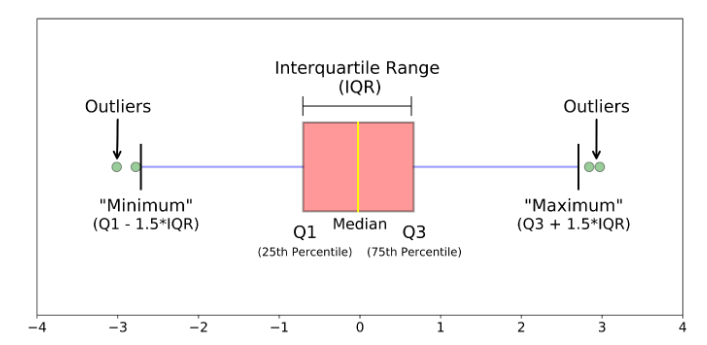

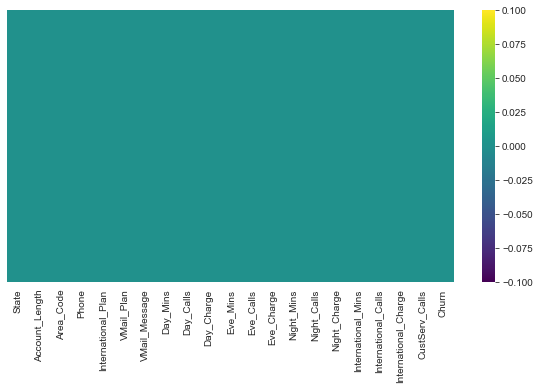

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

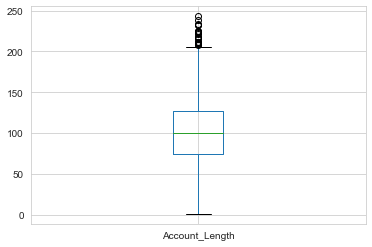

In [38]:
data[['Account_Length']].boxplot();

3939/4617 data points remain


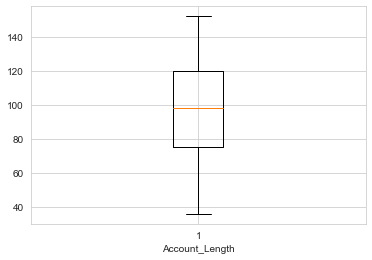

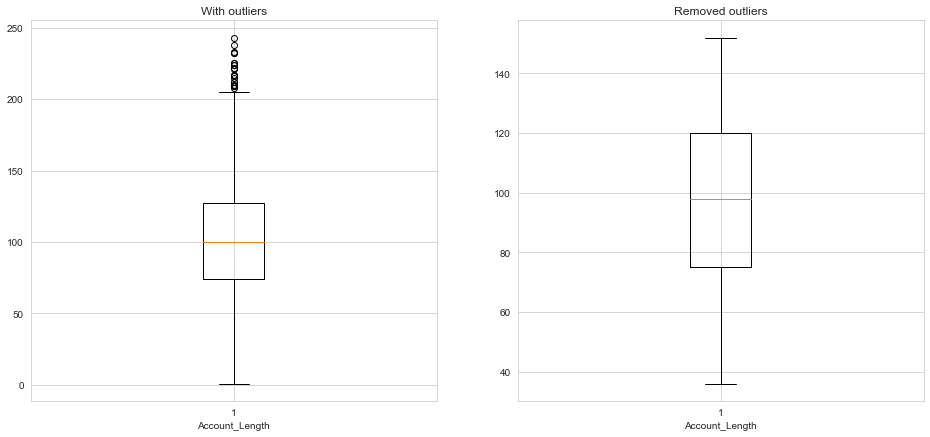

In [39]:
X=data.Account_Length
removed_outliers_Account_Length=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_Account_Length].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_Account_Length]);
plt.xlabel("Account_Length")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Account_Length]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("Account_Length")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("Account_Length")
data['clean_Account_Length']=X[removed_outliers_Account_Length]


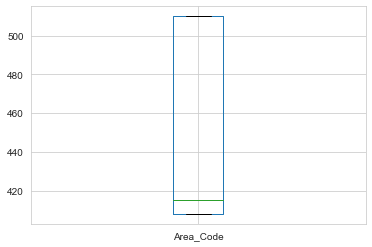

In [40]:
data[['Area_Code']].boxplot();

4617/4617 data points remain


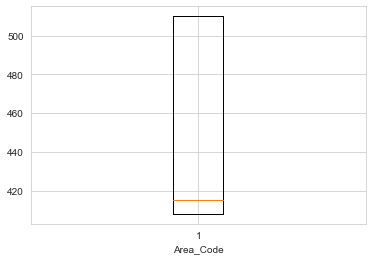

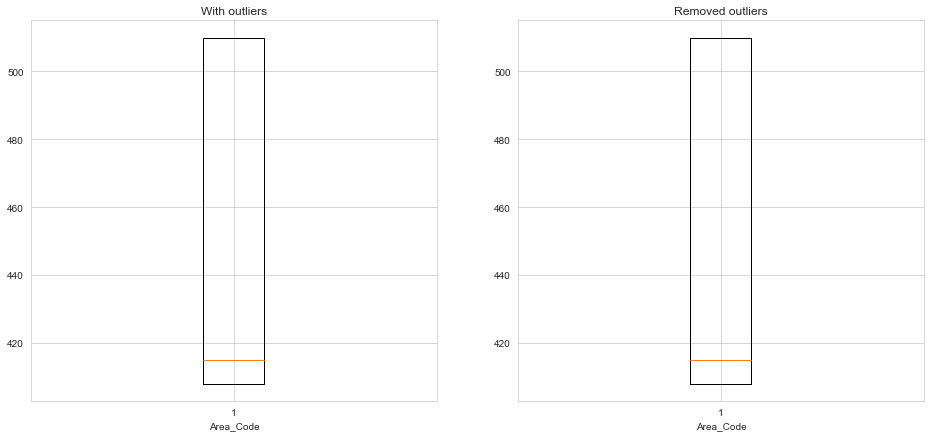

In [41]:
X=data.Area_Code
removed_outliers_Area_Code=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_Area_Code].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_Area_Code]);
plt.xlabel("Area_Code")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Area_Code]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("Area_Code")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("Area_Code")
data['clean_Area_Code']=X[removed_outliers_Area_Code]

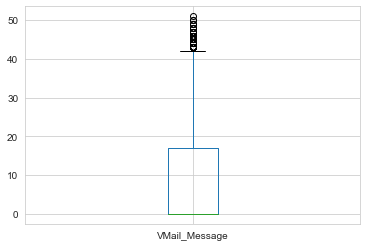

In [42]:
data[['VMail_Message']].boxplot();

1171/4617 data points remain


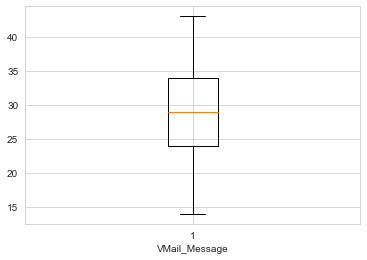

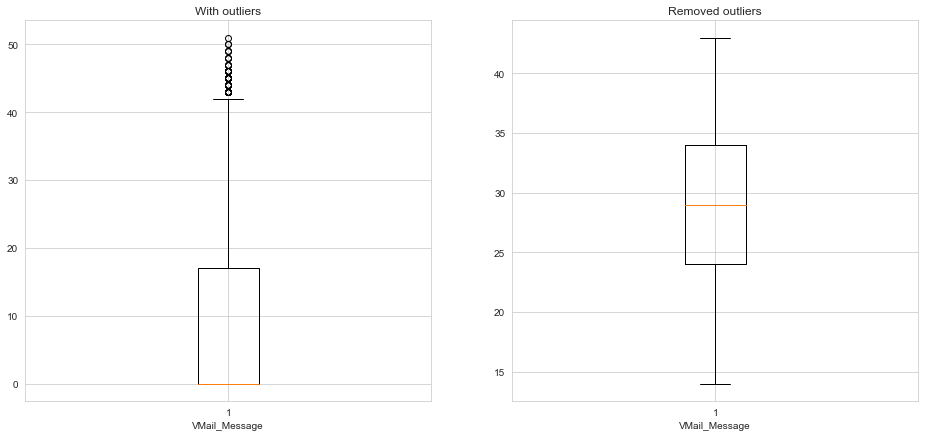

In [43]:
X=data.VMail_Message
removed_outliers_VMail_Message=X.between(X.quantile(0.74),X.quantile(0.99))
print(str(X[removed_outliers_VMail_Message].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_VMail_Message]);
plt.xlabel("VMail_Message")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_VMail_Message]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("VMail_Message")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("VMail_Message")
data['clean_VMail_Message']=X[removed_outliers_VMail_Message]

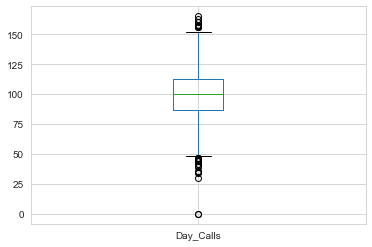

In [44]:
data[['Day_Calls']].boxplot();

3951/4617 data points remain


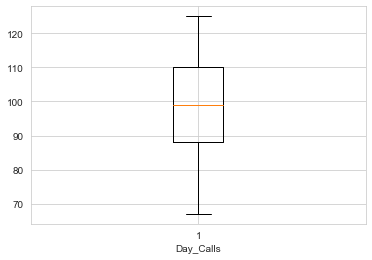

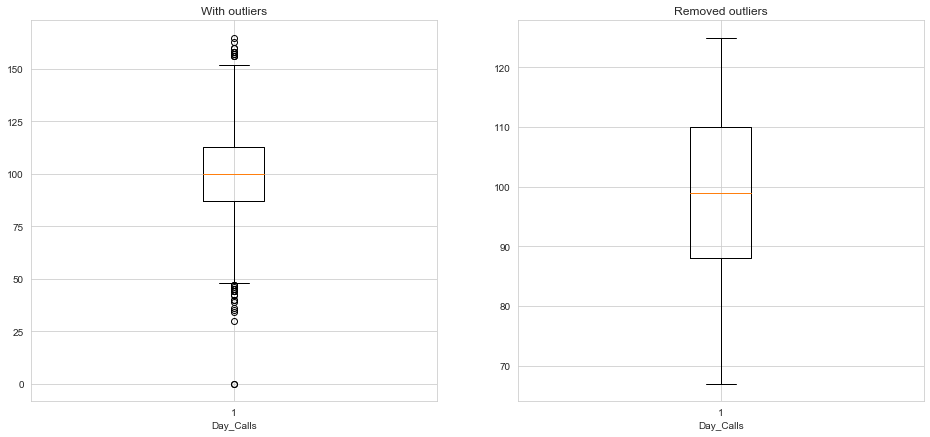

In [45]:
X=data.Day_Calls
removed_outliers_Day_Calls=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_Day_Calls].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_Day_Calls]);
plt.xlabel("Day_Calls")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Day_Calls]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("Day_Calls")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("Day_Calls")
data['clean_Day_Calls']=X[removed_outliers_Day_Calls]

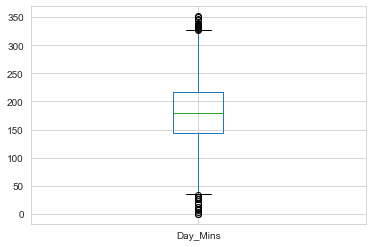

In [46]:
data[['Day_Mins']].boxplot();

3924/4617 data points remain


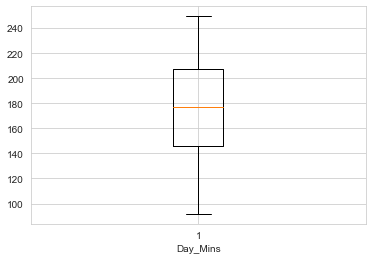

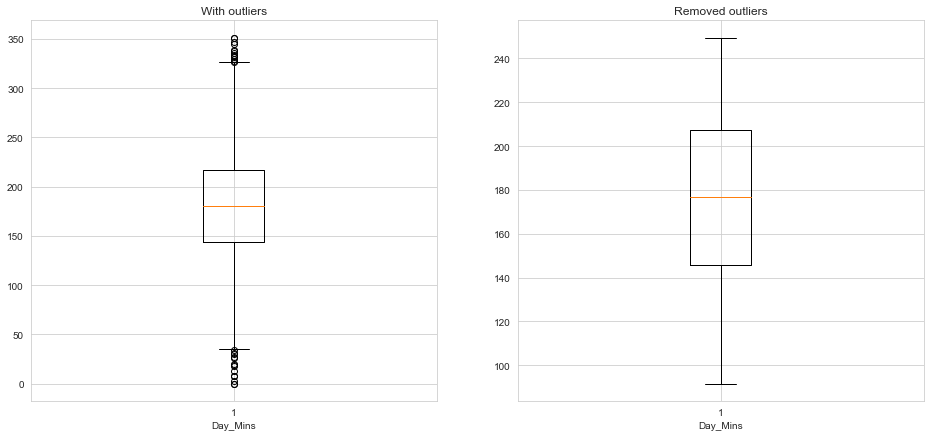

In [47]:
X=data.Day_Mins
removed_outliers_Day_Mins=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_Day_Mins].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_Day_Mins]);
plt.xlabel("Day_Mins")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Day_Mins]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("Day_Mins")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("Day_Mins")
data['clean_Day_Mins']=X[removed_outliers_Day_Mins]

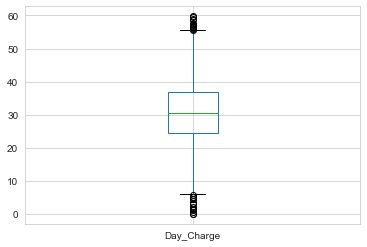

In [48]:
data[['Day_Charge']].boxplot();

3924/4617 data points remain


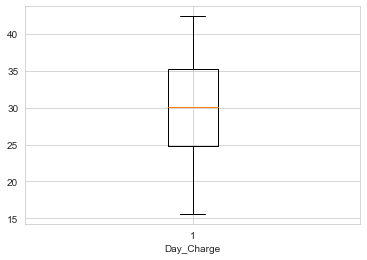

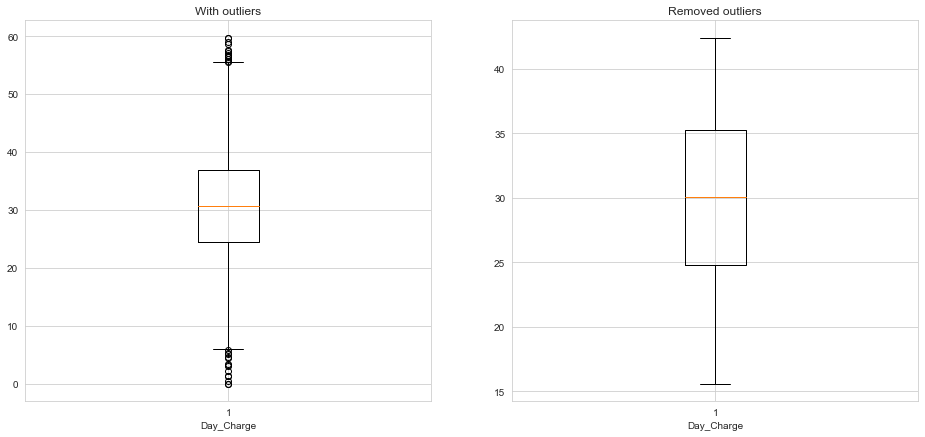

In [49]:
X=data.Day_Charge
removed_outliers_Day_Charge=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_Day_Charge].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_Day_Charge]);
plt.xlabel("Day_Charge")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Day_Charge]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("Day_Charge")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("Day_Charge")
data['clean_Day_Charge']=X[removed_outliers_Day_Charge]

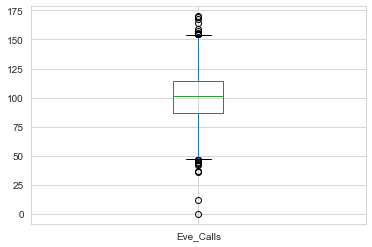

In [50]:
data[['Eve_Calls']].boxplot();

3960/4617 data points remain


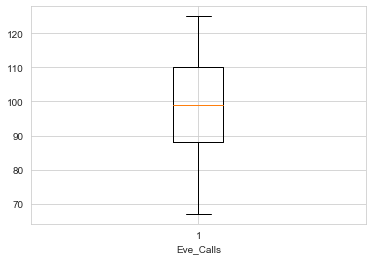

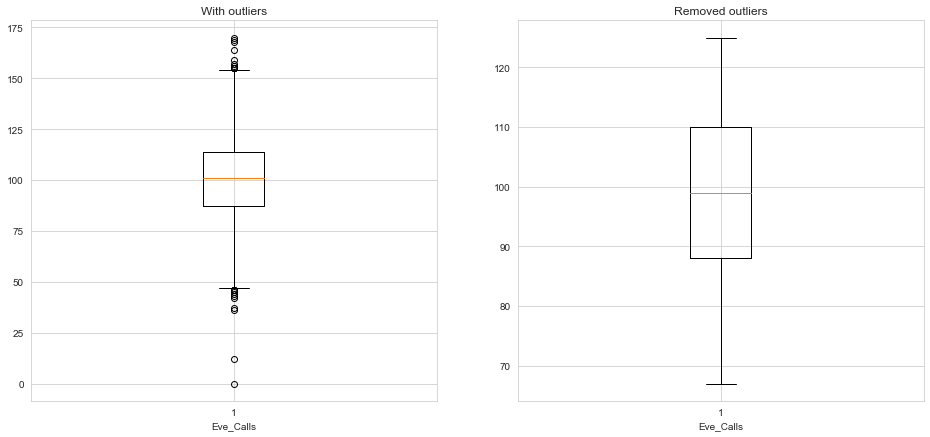

In [51]:
X=data.Eve_Calls
removed_outliers_Eve_Calls=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_Eve_Calls].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_Eve_Calls]);
plt.xlabel("Eve_Calls")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Eve_Calls]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("Eve_Calls")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("Eve_Calls")
data['clean_Eve_Calls']=X[removed_outliers_Eve_Calls]

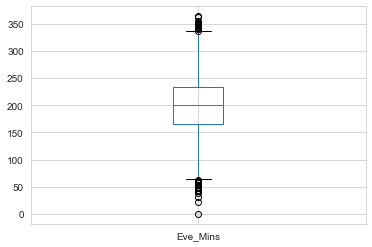

In [52]:
data[['Eve_Mins']].boxplot();

3924/4617 data points remain


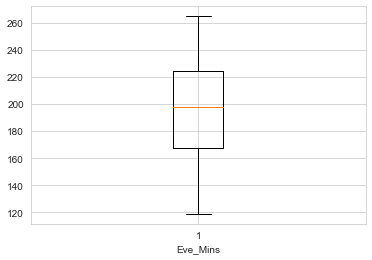

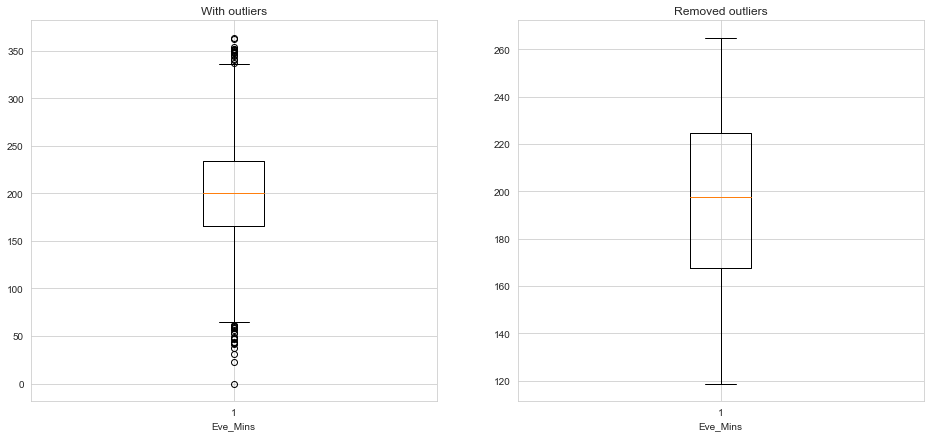

In [53]:
X=data.Eve_Mins
removed_outliers_Eve_Mins=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_Eve_Mins].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_Eve_Mins]);
plt.xlabel("Eve_Mins")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Eve_Mins]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("Eve_Mins")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("Eve_Mins")
data['clean_Eve_Mins']=X[removed_outliers_Eve_Mins]

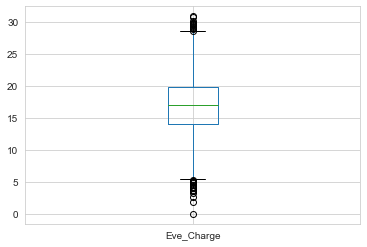

In [54]:
data[['Eve_Charge']].boxplot();

3924/4617 data points remain


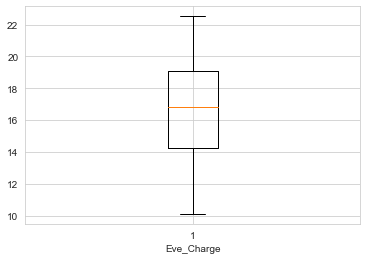

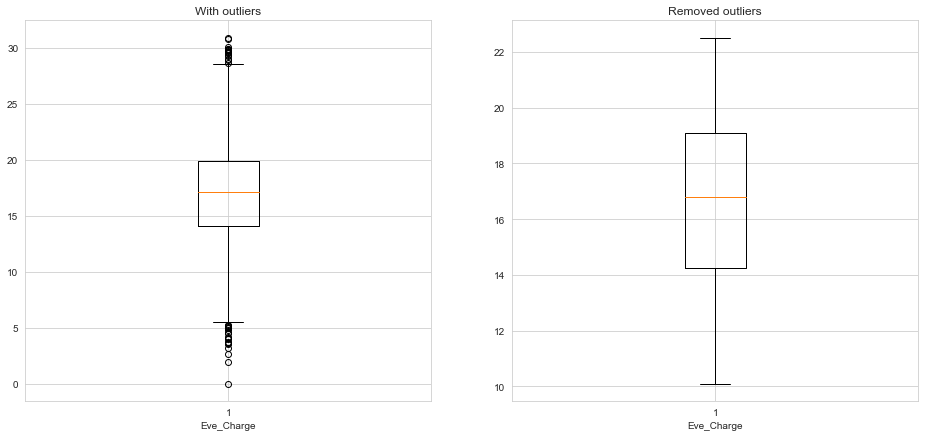

In [55]:
X=data.Eve_Charge
removed_outliers_Eve_Charge=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_Eve_Charge].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_Eve_Charge]);
plt.xlabel("Eve_Charge")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Eve_Charge]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("Eve_Charge")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("Eve_Charge")
data['clean_Eve_Charge']=X[removed_outliers_Eve_Charge]

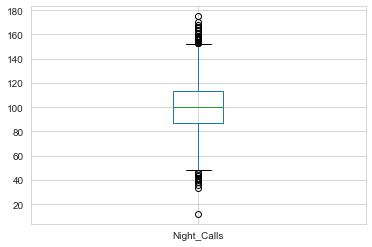

In [56]:
data[['Night_Calls']].boxplot();

3976/4617 data points remain


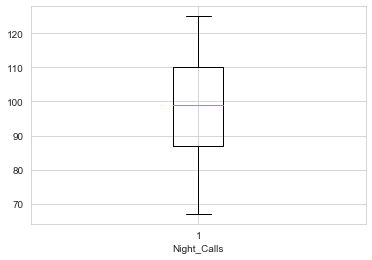

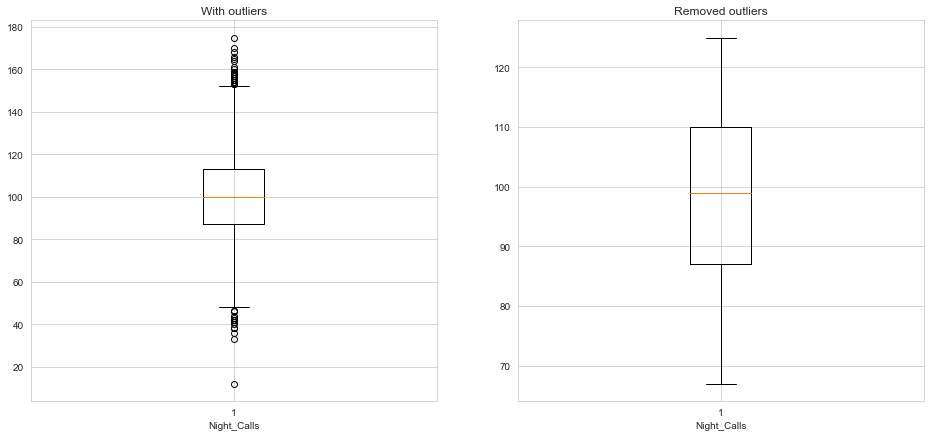

In [57]:
X=data.Night_Calls
removed_outliers_Night_Calls=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_Night_Calls].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_Night_Calls]);
plt.xlabel("Night_Calls")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Night_Calls]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("Night_Calls")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("Night_Calls")
data['clean_Night_Calls']=X[removed_outliers_Night_Calls]

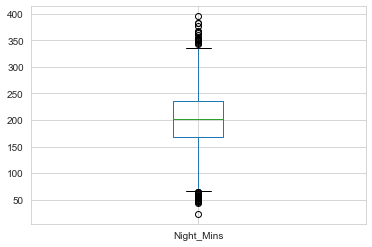

In [58]:
data[['Night_Mins']].boxplot();

3926/4617 data points remain


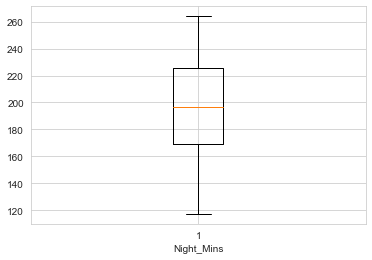

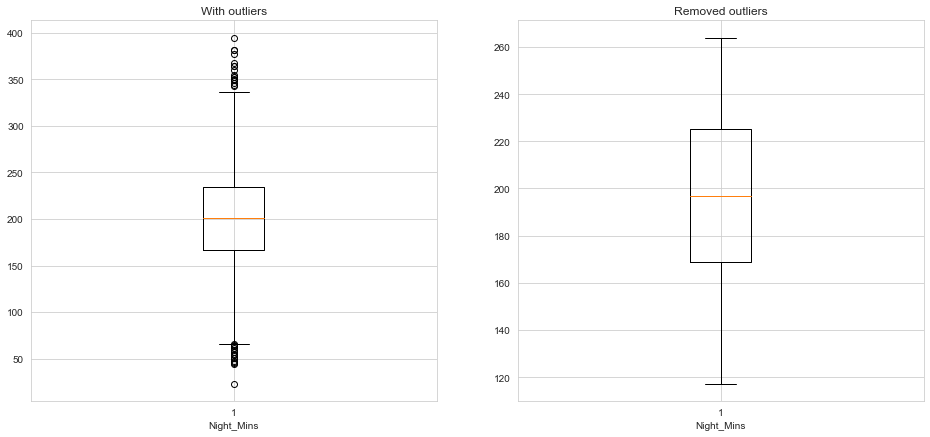

In [59]:
X=data.Night_Mins
removed_outliers_Night_Mins=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_Night_Mins].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_Night_Mins]);
plt.xlabel("Night_Mins")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Night_Mins]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("Night_Mins")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("Night_Mins")
data['clean_Night_Mins']=X[removed_outliers_Night_Mins]

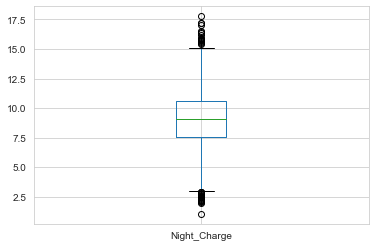

In [60]:
data[['Night_Charge']].boxplot();

3928/4617 data points remain


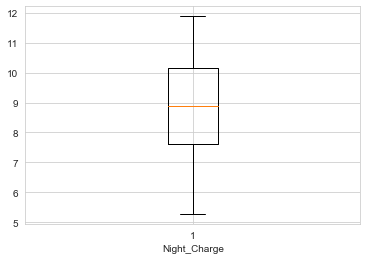

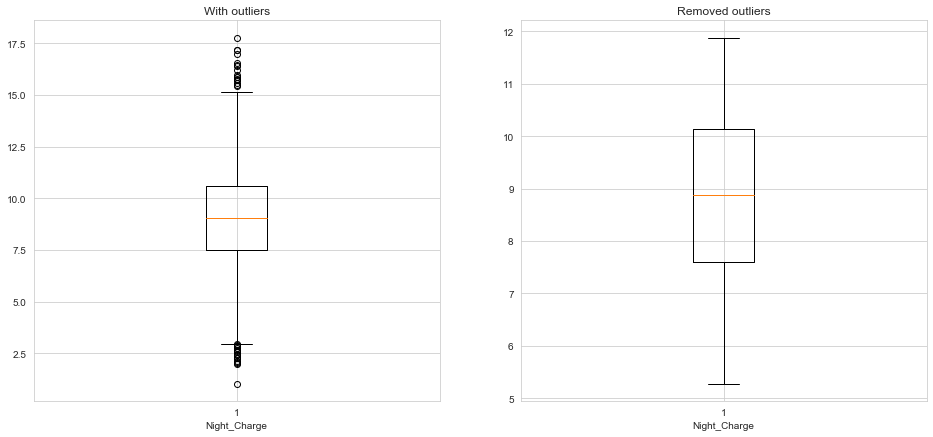

In [61]:
X=data.Night_Charge
removed_outliers_Night_Charge=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_Night_Charge].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_Night_Charge]);
plt.xlabel("Night_Charge")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_Night_Charge]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("Night_Charge")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("Night_Charge")
data['clean_Night_Charge']=X[removed_outliers_Night_Charge]

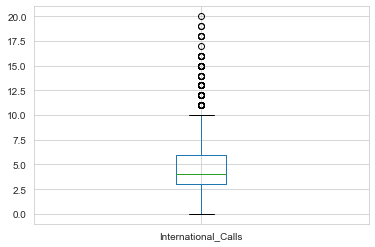

In [62]:
data[['International_Calls']].boxplot();

4276/4617 data points remain


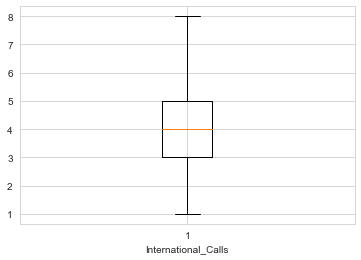

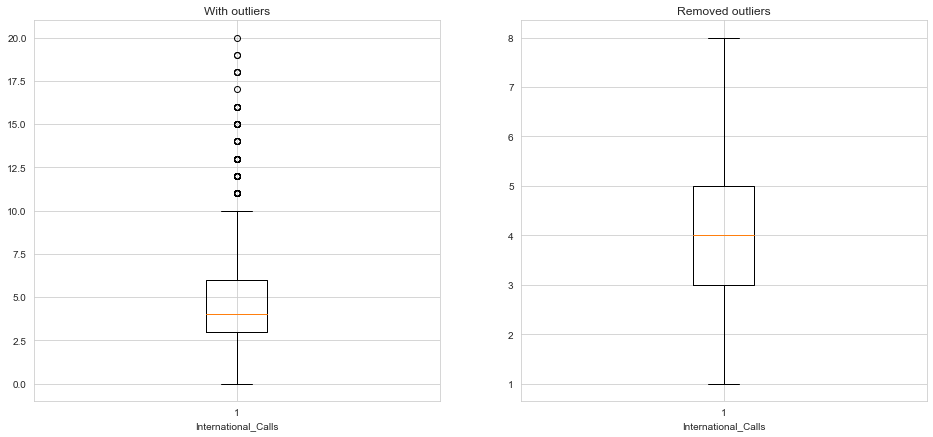

In [63]:
X=data.International_Calls
removed_outliers_International_Calls=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_International_Calls].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_International_Calls]);
plt.xlabel("International_Calls")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_International_Calls]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("International_Calls")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("International_Calls")
data['clean_International_Calls']=X[removed_outliers_International_Calls]

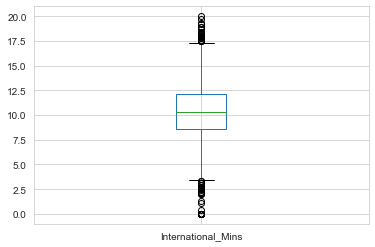

In [64]:
data[['International_Mins']].boxplot();

3938/4617 data points remain


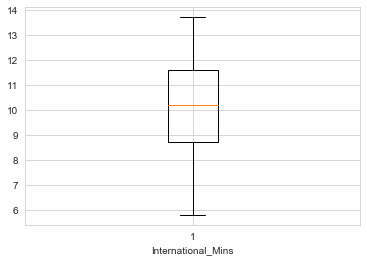

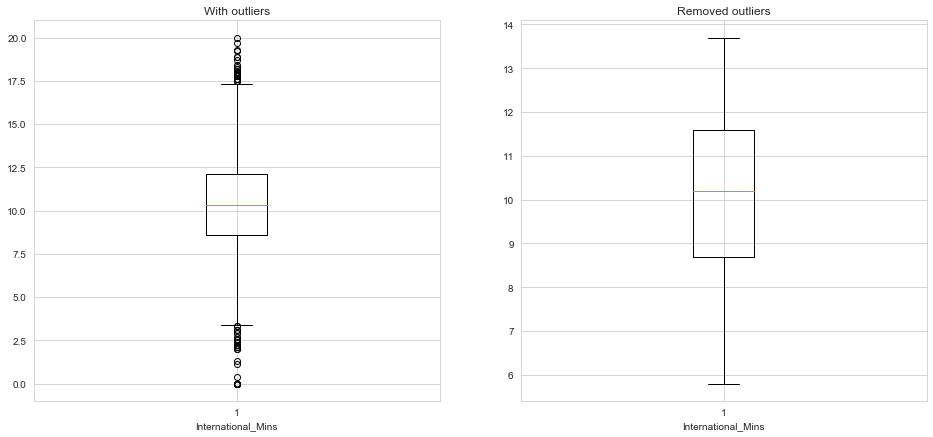

In [65]:
X=data.International_Mins
removed_outliers_International_Mins=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_International_Mins].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_International_Mins]);
plt.xlabel("International_Mins")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_International_Mins]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("International_Mins")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("International_Mins")
data['clean_International_Mins']=X[removed_outliers_International_Mins]

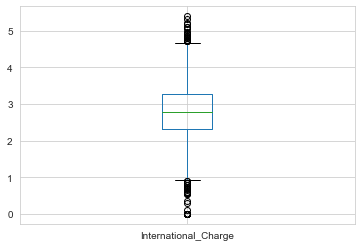

In [66]:
data[['International_Charge']].boxplot();

3938/4617 data points remain


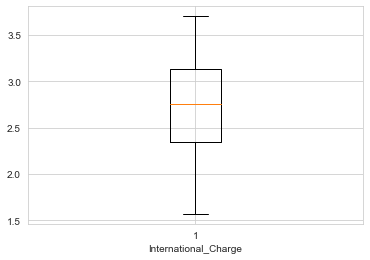

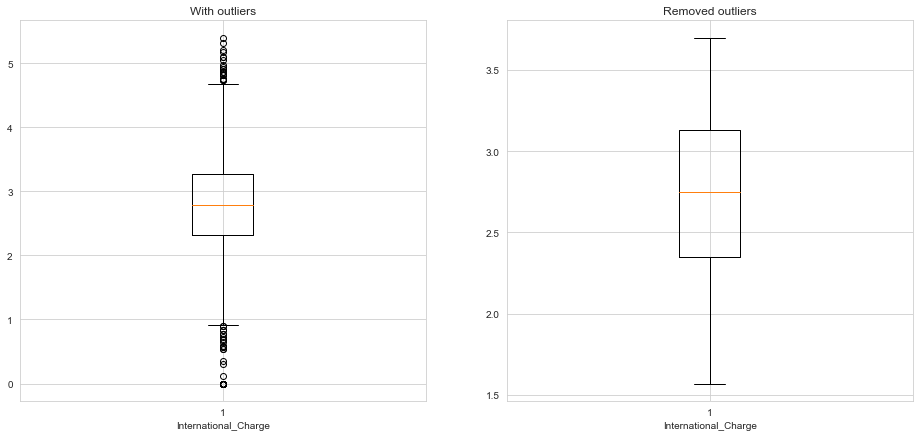

In [67]:
X=data.International_Charge
removed_outliers_International_Charge=X.between(X.quantile(0.05),X.quantile(0.90))
print(str(X[removed_outliers_International_Charge].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_International_Charge]);
plt.xlabel("International_Charge")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_International_Charge]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("International_Charge")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("International_Charge")
data['clean_International_Charge']=X[removed_outliers_International_Charge]

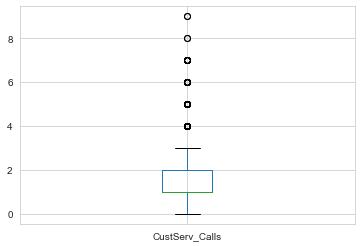

In [68]:
data[['CustServ_Calls']].boxplot();

4249/4617 data points remain


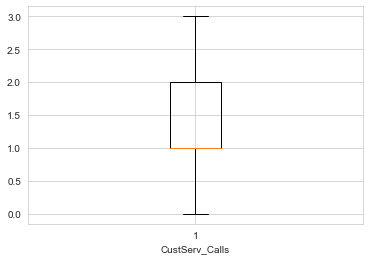

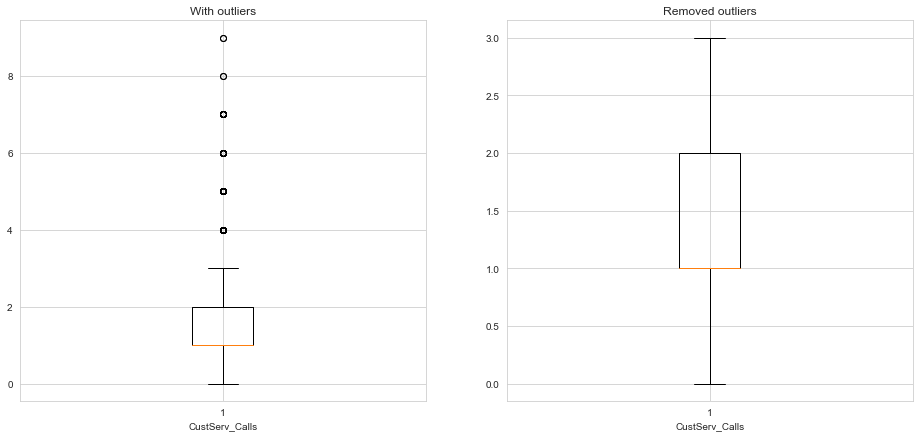

In [69]:
X=data.CustServ_Calls
removed_outliers_CustServ_Calls=X.between(X.quantile(0.05),X.quantile(0.91))
print(str(X[removed_outliers_CustServ_Calls].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_CustServ_Calls]);
plt.xlabel("CustServ_Calls")
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_CustServ_Calls]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("CustServ_Calls")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("CustServ_Calls")
data['clean_CustServ_Calls']=X[removed_outliers_CustServ_Calls]

# Using label encoding

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
enc=LabelEncoder()
print(enc)

LabelEncoder()


In [72]:
List=['International_Plan','State','VMail_Plan','Churn']
for i in List:
    data[[i]]=enc.fit_transform(data[[i]])

In [73]:
data.drop('Phone',inplace=True,axis=1)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State                       4617 non-null   int32  
 1   Account_Length              4617 non-null   int64  
 2   Area_Code                   4617 non-null   int64  
 3   International_Plan          4617 non-null   int32  
 4   VMail_Plan                  4617 non-null   int32  
 5   VMail_Message               4617 non-null   int64  
 6   Day_Mins                    4617 non-null   float64
 7   Day_Calls                   4617 non-null   int64  
 8   Day_Charge                  4617 non-null   float64
 9   Eve_Mins                    4617 non-null   float64
 10  Eve_Calls                   4617 non-null   int64  
 11  Eve_Charge                  4617 non-null   float64
 12  Night_Mins                  4617 non-null   float64
 13  Night_Calls                 4617 

## Checking for outliers in the remaining fields

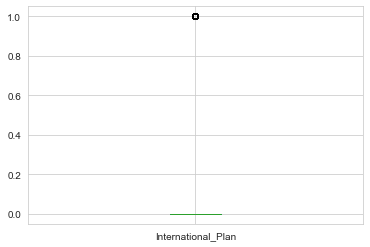

In [75]:
data[['International_Plan']].boxplot();

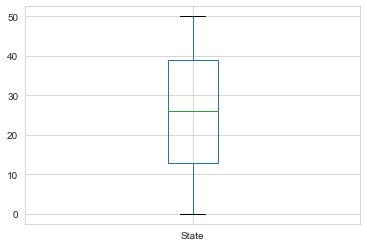

In [76]:
data[['State']].boxplot();

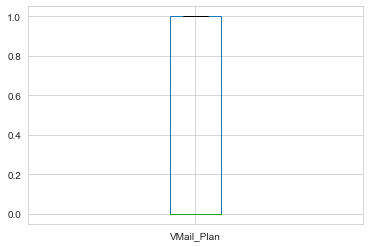

In [77]:
data[['VMail_Plan']].boxplot();

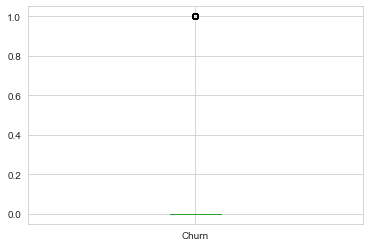

In [78]:
data[['Churn']].boxplot();

# ---------------------------------------------------------------------------------------------------------------

In [79]:
data.drop(['Account_Length','Area_Code'],inplace=True,axis=1)

In [80]:
data.drop(['VMail_Message','Day_Calls','Day_Mins','Day_Charge',
          'Eve_Calls','Eve_Mins','Eve_Charge',
          'Night_Calls','Night_Mins','Night_Charge',
          'International_Calls','International_Mins','International_Charge',
          'CustServ_Calls'],inplace=True,axis=1)

In [81]:
data.head()

,State,International_Plan,VMail_Plan,Churn,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,clean_Eve_Calls,clean_Eve_Mins,clean_Eve_Charge,clean_Night_Calls,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls
0,16,0,1,0,128.0,415,25.0,110.0,NaN,NaN,99.0,197.4,16.78,91.0,244.7,11.01,3.0,10.0,2.70,1.0
1,35,0,1,0,107.0,415,26.0,123.0,161.6,27.47,103.0,195.5,16.62,103.0,254.4,11.45,3.0,13.7,3.70,1.0
2,31,0,0,0,137.0,415,NaN,114.0,243.4,41.38,110.0,121.2,10.30,104.0,162.6,7.32,5.0,12.2,3.29,0.0
3,35,1,0,0,84.0,408,NaN,71.0,NaN,NaN,88.0,NaN,NaN,89.0,196.9,8.86,7.0,6.6,1.78,2.0
4,36,1,0,0,75.0,415,NaN,113.0,166.7,28.34,122.0,148.3,12.61,121.0,186.9,8.41,3.0,10.1,2.73,3.0


In [82]:
data.shape

(4617, 20)

### Correlation Matrix

In [83]:
corr=data.corr()
corr

,State,International_Plan,VMail_Plan,Churn,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,clean_Eve_Calls,clean_Eve_Mins,clean_Eve_Charge,clean_Night_Calls,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls
State,1.000000,0.009789,-0.033323,0.010979,0.003198,0.015370,0.044921,-0.005927,0.014497,0.014496,-0.001811,0.008995,0.008984,0.000756,0.014336,0.015092,0.011528,0.000550,0.000502,-0.009709
International_Plan,0.009789,1.000000,0.009278,0.257524,0.025634,0.039263,0.011464,0.014840,0.007638,0.007637,0.001465,0.002844,0.002852,-0.001136,-0.023966,-0.024266,-0.004410,0.030384,0.030349,-0.025153
VMail_Plan,-0.033323,0.009278,1.000000,-0.110149,0.004693,-0.003150,NaN,-0.000478,0.026290,0.026292,-0.001244,0.030346,0.030346,0.008817,-0.006104,-0.006689,-0.008385,-0.000379,-0.000345,-0.023809
Churn,0.010979,0.257524,-0.110149,1.000000,0.007805,0.011995,0.053259,0.026988,0.009026,0.009013,-0.013830,0.051814,0.051802,-0.012660,0.024500,0.024099,-0.076634,0.031475,0.031458,-0.014492
clean_Account_Length,0.003198,0.025634,0.004693,0.007805,1.000000,-0.016211,-0.059679,-0.000107,0.015032,0.015033,-0.013305,-0.002783,-0.002771,0.001217,0.015249,0.015958,0.014886,0.009651,0.009675,-0.000624
clean_Area_Code,0.015370,0.039263,-0.003150,0.011995,-0.016211,1.000000,0.030756,-0.007911,-0.015036,-0.015041,-0.018948,0.020696,0.020725,-0.008748,0.020864,0.020326,-0.015909,-0.025489,-0.025682,0.036070
clean_VMail_Message,0.044921,0.011464,NaN,0.053259,-0.059679,0.030756,1.000000,0.010764,0.023090,0.023079,0.031306,-0.054271,-0.054252,-0.048144,-0.006424,-0.006415,0.037088,0.008621,0.008620,0.065180
clean_Day_Calls,-0.005927,0.014840,-0.000478,0.026988,-0.000107,-0.007911,0.010764,1.000000,0.008809,0.008824,0.026345,0.001153,0.001155,-0.015868,0.026299,0.026262,-0.007953,0.006967,0.007025,-0.010029
clean_Day_Mins,0.014497,0.007638,0.026290,0.009026,0.015032,-0.015036,0.023090,0.008809,1.000000,1.000000,0.003106,-0.016845,-0.016837,0.007408,-0.035471,-0.036159,-0.016305,-0.021861,-0.021740,-0.025036
clean_Day_Charge,0.014496,0.007637,0.026292,0.009013,0.015033,-0.015041,0.023079,0.008824,1.000000,1.000000,0.003102,-0.016847,-0.016839,0.007415,-0.035463,-0.036151,-0.016307,-0.021856,-0.021735,-0.025045


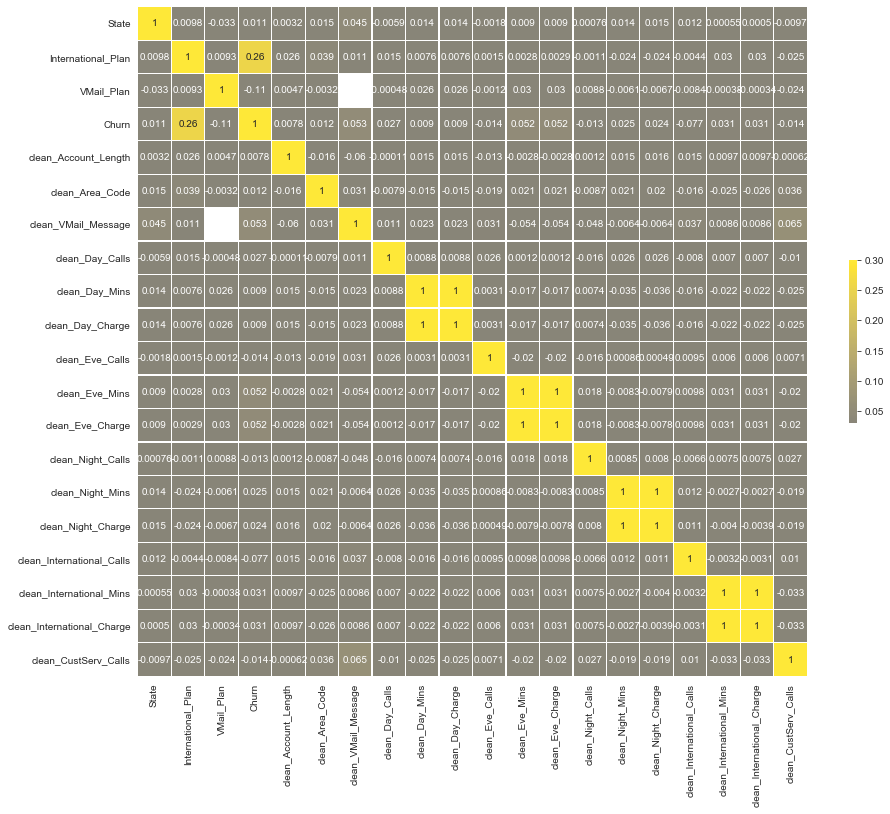

In [84]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='cividis', vmax=.3,vmin=.03 ,center=0,square=True, linewidths=.2, cbar_kws={"shrink": .2}, annot=True)

In [85]:
State_correlation=data.corr()['State'].sort_values()
State_correlation

VMail_Plan                   -0.033323
clean_CustServ_Calls         -0.009709
clean_Day_Calls              -0.005927
clean_Eve_Calls              -0.001811
clean_International_Charge    0.000502
clean_International_Mins      0.000550
clean_Night_Calls             0.000756
clean_Account_Length          0.003198
clean_Eve_Charge              0.008984
clean_Eve_Mins                0.008995
International_Plan            0.009789
Churn                         0.010979
clean_International_Calls     0.011528
clean_Night_Mins              0.014336
clean_Day_Charge              0.014496
clean_Day_Mins                0.014497
clean_Night_Charge            0.015092
clean_Area_Code               0.015370
clean_VMail_Message           0.044921
State                         1.000000
Name: State, dtype: float64

In [86]:
Account_Length_correlation=data.corr()['clean_Account_Length'].sort_values()
Account_Length_correlation

clean_VMail_Message          -0.059679
clean_Area_Code              -0.016211
clean_Eve_Calls              -0.013305
clean_Eve_Mins               -0.002783
clean_Eve_Charge             -0.002771
clean_CustServ_Calls         -0.000624
clean_Day_Calls              -0.000107
clean_Night_Calls             0.001217
State                         0.003198
VMail_Plan                    0.004693
Churn                         0.007805
clean_International_Mins      0.009651
clean_International_Charge    0.009675
clean_International_Calls     0.014886
clean_Day_Mins                0.015032
clean_Day_Charge              0.015033
clean_Night_Mins              0.015249
clean_Night_Charge            0.015958
International_Plan            0.025634
clean_Account_Length          1.000000
Name: clean_Account_Length, dtype: float64

In [87]:
Area_Code_correlation=data.corr()['clean_Area_Code'].sort_values()
Area_Code_correlation

clean_International_Charge   -0.025682
clean_International_Mins     -0.025489
clean_Eve_Calls              -0.018948
clean_Account_Length         -0.016211
clean_International_Calls    -0.015909
clean_Day_Charge             -0.015041
clean_Day_Mins               -0.015036
clean_Night_Calls            -0.008748
clean_Day_Calls              -0.007911
VMail_Plan                   -0.003150
Churn                         0.011995
State                         0.015370
clean_Night_Charge            0.020326
clean_Eve_Mins                0.020696
clean_Eve_Charge              0.020725
clean_Night_Mins              0.020864
clean_VMail_Message           0.030756
clean_CustServ_Calls          0.036070
International_Plan            0.039263
clean_Area_Code               1.000000
Name: clean_Area_Code, dtype: float64

In [88]:
International_Plan_correlation=data.corr()['International_Plan'].sort_values()
International_Plan_correlation

clean_CustServ_Calls         -0.025153
clean_Night_Charge           -0.024266
clean_Night_Mins             -0.023966
clean_International_Calls    -0.004410
clean_Night_Calls            -0.001136
clean_Eve_Calls               0.001465
clean_Eve_Mins                0.002844
clean_Eve_Charge              0.002852
clean_Day_Charge              0.007637
clean_Day_Mins                0.007638
VMail_Plan                    0.009278
State                         0.009789
clean_VMail_Message           0.011464
clean_Day_Calls               0.014840
clean_Account_Length          0.025634
clean_International_Charge    0.030349
clean_International_Mins      0.030384
clean_Area_Code               0.039263
Churn                         0.257524
International_Plan            1.000000
Name: International_Plan, dtype: float64

In [89]:
VMail_Plan_correlation=data.corr()['VMail_Plan'].sort_values()
VMail_Plan_correlation

Churn                        -0.110149
State                        -0.033323
clean_CustServ_Calls         -0.023809
clean_International_Calls    -0.008385
clean_Night_Charge           -0.006689
clean_Night_Mins             -0.006104
clean_Area_Code              -0.003150
clean_Eve_Calls              -0.001244
clean_Day_Calls              -0.000478
clean_International_Mins     -0.000379
clean_International_Charge   -0.000345
clean_Account_Length          0.004693
clean_Night_Calls             0.008817
International_Plan            0.009278
clean_Day_Mins                0.026290
clean_Day_Charge              0.026292
clean_Eve_Charge              0.030346
clean_Eve_Mins                0.030346
VMail_Plan                    1.000000
clean_VMail_Message                NaN
Name: VMail_Plan, dtype: float64

In [90]:
VMail_Message_correlation=data.corr()['clean_VMail_Message'].sort_values()
VMail_Message_correlation

clean_Account_Length         -0.059679
clean_Eve_Mins               -0.054271
clean_Eve_Charge             -0.054252
clean_Night_Calls            -0.048144
clean_Night_Mins             -0.006424
clean_Night_Charge           -0.006415
clean_International_Charge    0.008620
clean_International_Mins      0.008621
clean_Day_Calls               0.010764
International_Plan            0.011464
clean_Day_Charge              0.023079
clean_Day_Mins                0.023090
clean_Area_Code               0.030756
clean_Eve_Calls               0.031306
clean_International_Calls     0.037088
State                         0.044921
Churn                         0.053259
clean_CustServ_Calls          0.065180
clean_VMail_Message           1.000000
VMail_Plan                         NaN
Name: clean_VMail_Message, dtype: float64

In [91]:
CustServ_Calls_correlation=data.corr()['clean_CustServ_Calls'].sort_values()
CustServ_Calls_correlation

clean_International_Charge   -0.032910
clean_International_Mins     -0.032802
International_Plan           -0.025153
clean_Day_Charge             -0.025045
clean_Day_Mins               -0.025036
VMail_Plan                   -0.023809
clean_Eve_Charge             -0.019988
clean_Eve_Mins               -0.019966
clean_Night_Charge           -0.019476
clean_Night_Mins             -0.018637
Churn                        -0.014492
clean_Day_Calls              -0.010029
State                        -0.009709
clean_Account_Length         -0.000624
clean_Eve_Calls               0.007097
clean_International_Calls     0.010119
clean_Night_Calls             0.026711
clean_Area_Code               0.036070
clean_VMail_Message           0.065180
clean_CustServ_Calls          1.000000
Name: clean_CustServ_Calls, dtype: float64

In [92]:
Churn_correlation=data.corr()['Churn'].sort_values()
Churn_correlation

VMail_Plan                   -0.110149
clean_International_Calls    -0.076634
clean_CustServ_Calls         -0.014492
clean_Eve_Calls              -0.013830
clean_Night_Calls            -0.012660
clean_Account_Length          0.007805
clean_Day_Charge              0.009013
clean_Day_Mins                0.009026
State                         0.010979
clean_Area_Code               0.011995
clean_Night_Charge            0.024099
clean_Night_Mins              0.024500
clean_Day_Calls               0.026988
clean_International_Charge    0.031458
clean_International_Mins      0.031475
clean_Eve_Charge              0.051802
clean_Eve_Mins                0.051814
clean_VMail_Message           0.053259
International_Plan            0.257524
Churn                         1.000000
Name: Churn, dtype: float64

# -------------------------------------------------------------------------------------------------------------

# Data Exploration Insights

# <b> 1. Understanding the variables that are influencing the customers to migrate.</b>

In [93]:
from scipy import stats

In [94]:
x_List=['clean_Account_Length','clean_CustServ_Calls',
        'clean_Day_Mins','clean_Day_Calls','clean_Day_Charge',
        'clean_Eve_Mins','clean_Eve_Calls','clean_Eve_Charge',
      'clean_International_Mins','clean_International_Calls',
        'clean_International_Charge',
     'clean_Night_Mins','clean_Night_Calls','clean_Night_Charge',
        'clean_VMail_Message']
y_List=['Churn']

In [95]:
x_List=data[x_List].agg(['skew','kurtosis','std','mean','median','min','max'])
print(x_List)

          clean_Account_Length  clean_CustServ_Calls  clean_Day_Mins  \
skew                 -0.104998              0.289315       -0.117898   
kurtosis             -0.863850             -0.897078       -0.878222   
std                  28.917856              0.975317       39.088705   
mean                 97.048743              1.308779      175.809455   
median               98.000000              1.000000      176.800000   
min                  36.000000              0.000000       91.700000   
max                 152.000000              3.000000      249.500000   

          clean_Day_Calls  clean_Day_Charge  clean_Eve_Mins  clean_Eve_Calls  \
skew            -0.155397         -0.117933       -0.099549        -0.154182   
kurtosis        -0.824201         -0.878161       -0.891982        -0.844835   
std             14.518237          6.644971       36.588258        14.540837   
mean            98.468742         29.888168      196.098904        98.438131   
median          99.0000

In [96]:
Normality=pd.DataFrame()
for i in x_List:
    print(i,stats.shapiro(data[[i]]))

clean_Account_Length (nan, 1.0)
clean_CustServ_Calls (nan, 1.0)
clean_Day_Mins (nan, 1.0)
clean_Day_Calls (nan, 1.0)
clean_Day_Charge (nan, 1.0)
clean_Eve_Mins (nan, 1.0)
clean_Eve_Calls (nan, 1.0)
clean_Eve_Charge (nan, 1.0)
clean_International_Mins (nan, 1.0)
clean_International_Calls (nan, 1.0)
clean_International_Charge (nan, 1.0)
clean_Night_Mins (nan, 1.0)
clean_Night_Calls (nan, 1.0)
clean_Night_Charge (nan, 1.0)
clean_VMail_Message (nan, 1.0)


In [97]:
one=data.groupby(by=['Churn'])['clean_Area_Code'].mean()
one

Churn
0    436.839939
1    438.292683
Name: clean_Area_Code, dtype: float64

In [98]:
data.groupby(by=['Churn'])['clean_Area_Code'].apply(lambda x:100 * x / float(x.sum())*100)

0       2.398396
1       2.398396
2       2.398396
3       2.357941
4       2.398396
          ...   
4612    2.947427
4613    2.357941
4614    2.357941
4615    2.398396
4616    2.398396
Name: clean_Area_Code, Length: 4617, dtype: float64

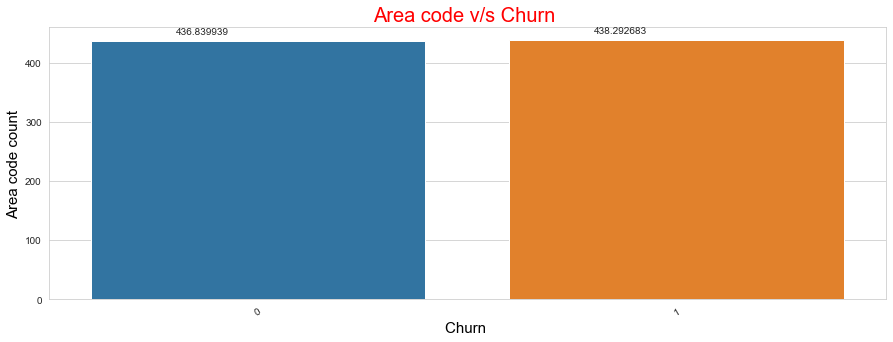

In [99]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_Area_Code'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Area code count",fontsize=15,color='black')
plt.title("Area code v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [100]:
data.groupby(by=['Churn'])['International_Plan'].mean()

Churn
0    0.065640
1    0.283537
Name: International_Plan, dtype: float64

In [101]:
data.groupby(by=['Churn'])['International_Plan'].apply(lambda x:100 * x / float(x.sum())*100)

0        0.000000
1        0.000000
2        0.000000
3       38.461538
4       38.461538
          ...    
4612     0.000000
4613     0.000000
4614     0.000000
4615     0.000000
4616     0.000000
Name: International_Plan, Length: 4617, dtype: float64

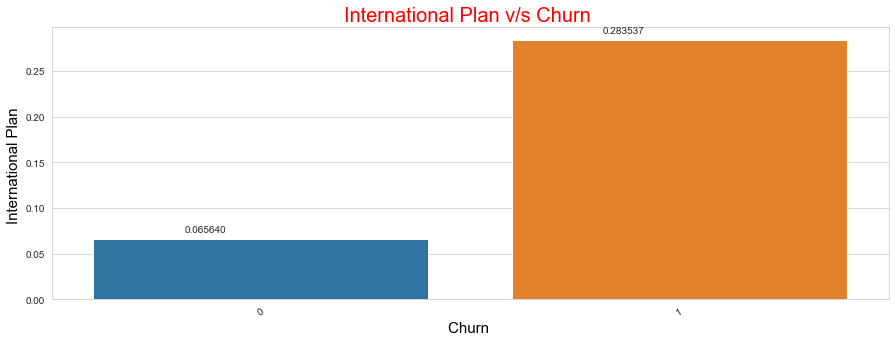

In [102]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['International_Plan'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("International Plan ",fontsize=15,color='black')
plt.title("International Plan v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [103]:
data.groupby(by=['Churn'])['VMail_Plan'].mean()

Churn
0    0.287554
1    0.147866
Name: VMail_Plan, dtype: float64

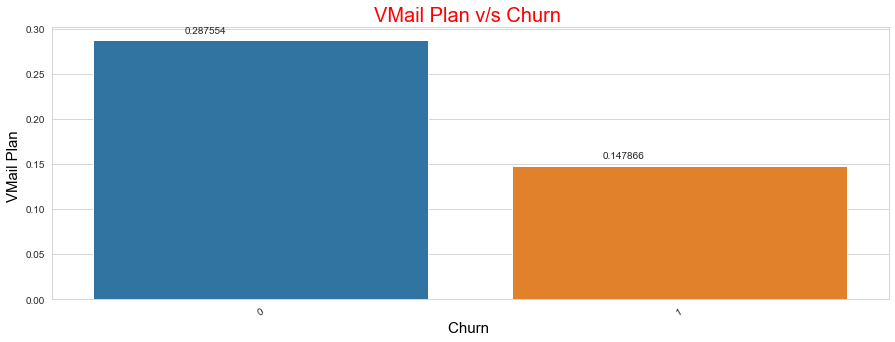

In [104]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['VMail_Plan'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("VMail Plan ",fontsize=15,color='black')
plt.title("VMail Plan v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [105]:
data.groupby(by=['Churn'])['clean_VMail_Message'].mean()

Churn
0    29.102873
1    30.445652
Name: clean_VMail_Message, dtype: float64

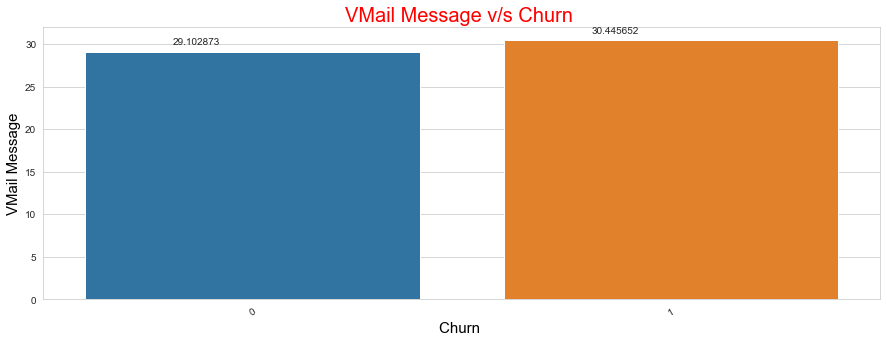

In [106]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_VMail_Message'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("VMail Message",fontsize=15,color='black')
plt.title("VMail Message v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [107]:
data.groupby(by=['Churn'])['clean_Day_Mins'].mean()

Churn
0    175.688465
1    176.838015
Name: clean_Day_Mins, dtype: float64

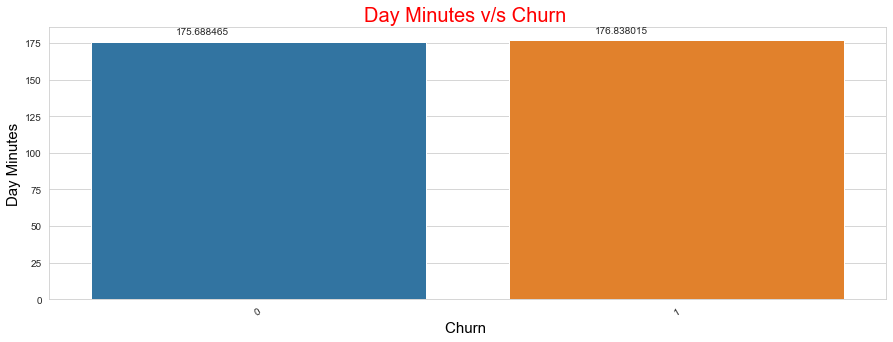

In [108]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_Day_Mins'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Day Minutes",fontsize=15,color='black')
plt.title("Day Minutes v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [109]:
data.groupby(by=['Churn'])['clean_Day_Calls'].mean()

Churn
0    98.310365
1    99.437838
Name: clean_Day_Calls, dtype: float64

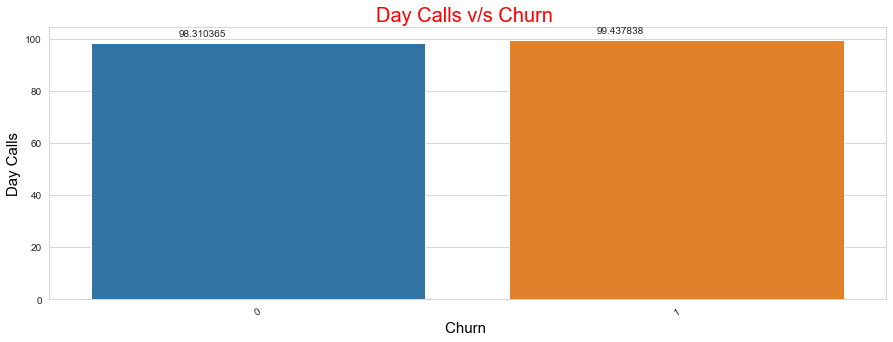

In [110]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_Day_Calls'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Day Calls",fontsize=15,color='black')
plt.title("Day Calls v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [111]:
data.groupby(by=['Churn'])['clean_Day_Charge'].mean()

Churn
0    29.86763
1    30.06276
Name: clean_Day_Charge, dtype: float64

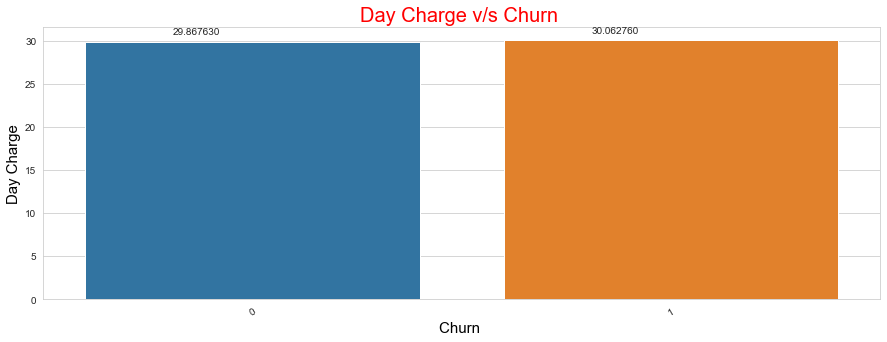

In [112]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_Day_Charge'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Day Charge",fontsize=15,color='black')
plt.title("Day Charge v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [113]:
data.groupby(by=['Churn'])['clean_Eve_Mins'].mean()

Churn
0    195.345766
1    200.869720
Name: clean_Eve_Mins, dtype: float64

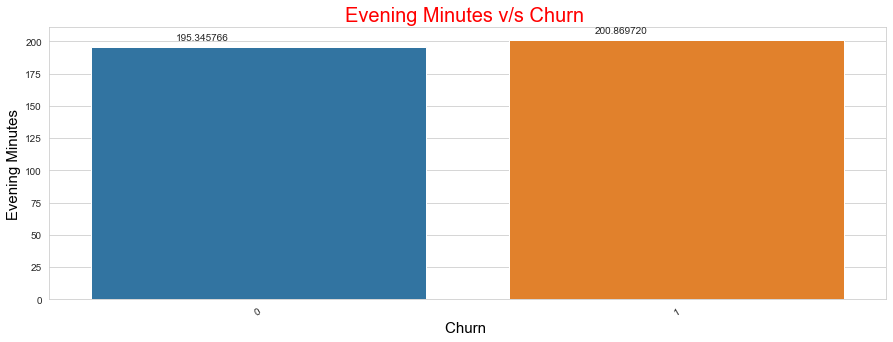

In [114]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_Eve_Mins'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Evening Minutes",fontsize=15,color='black')
plt.title("Evening Minutes v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [115]:
data.groupby(by=['Churn'])['clean_Eve_Calls'].mean()

Churn
0    98.520495
1    97.947276
Name: clean_Eve_Calls, dtype: float64

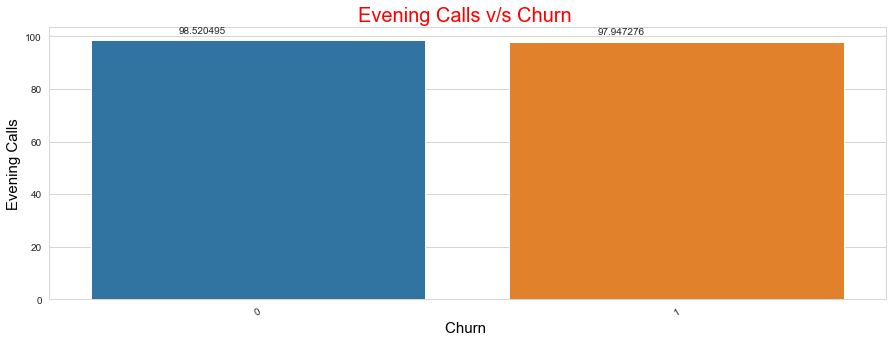

In [116]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_Eve_Calls'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Evening Calls",fontsize=15,color='black')
plt.title("Evening Calls v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [117]:
data.groupby(by=['Churn'])['clean_Eve_Charge'].mean()

Churn
0    16.604639
1    17.074075
Name: clean_Eve_Charge, dtype: float64

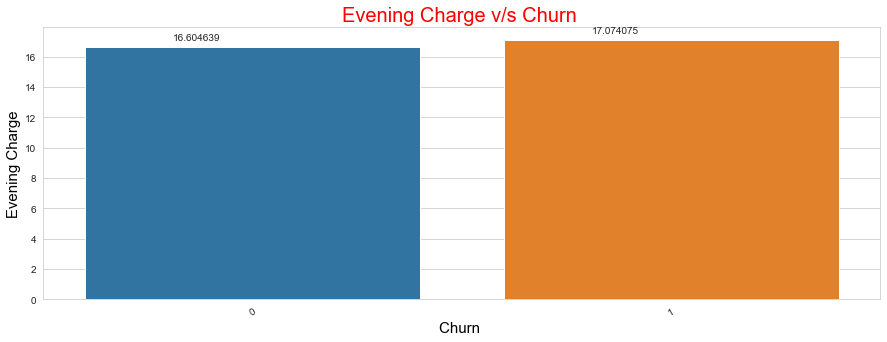

In [118]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_Eve_Charge'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Evening Charge",fontsize=15,color='black')
plt.title("Evening Charge v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [119]:
data.groupby(by=['Churn'])['clean_Night_Mins'].mean()

Churn
0    195.990175
1    198.563016
Name: clean_Night_Mins, dtype: float64

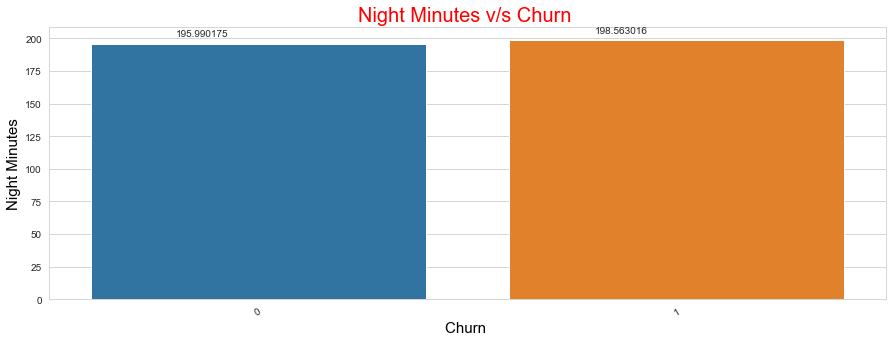

In [120]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_Night_Mins'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Night Minutes",fontsize=15,color='black')
plt.title("Night Minutes v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [121]:
data.groupby(by=['Churn'])['clean_Night_Calls'].mean()

Churn
0    98.266550
1    97.729537
Name: clean_Night_Calls, dtype: float64

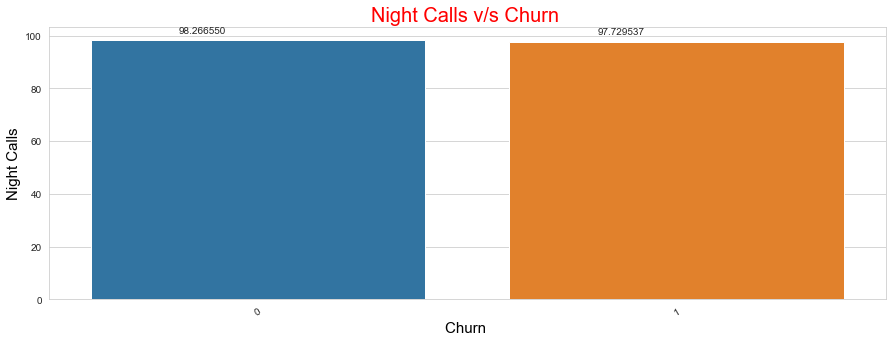

In [122]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_Night_Calls'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Night Calls",fontsize=15,color='black')
plt.title("Night Calls v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [123]:
data.groupby(by=['Churn'])['clean_Night_Charge'].mean()

Churn
0    8.821480
1    8.935458
Name: clean_Night_Charge, dtype: float64

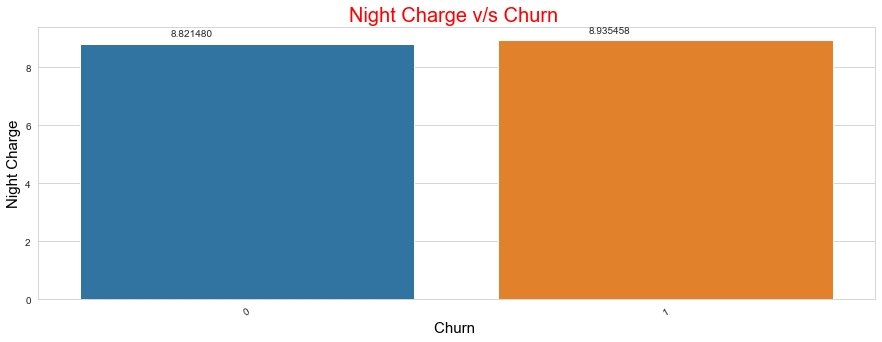

In [124]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_Night_Charge'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Night Charge",fontsize=15,color='black')
plt.title("Night Charge v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [125]:
data.groupby(by=['Churn'])['clean_International_Mins'].mean()

Churn
0    10.069480
1    10.248417
Name: clean_International_Mins, dtype: float64

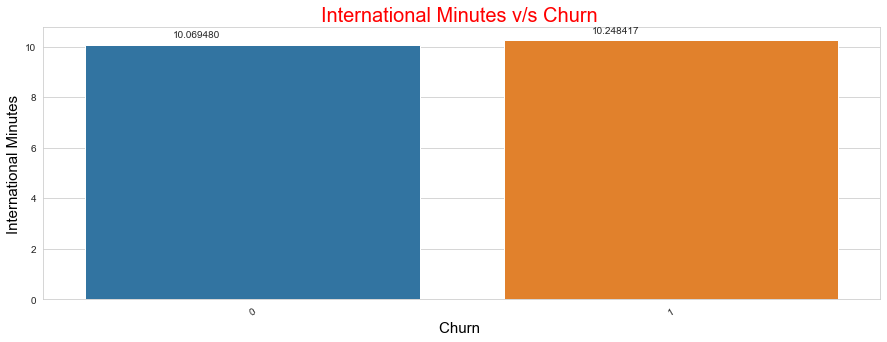

In [126]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_International_Mins'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("International Minutes",fontsize=15,color='black')
plt.title("International Minutes v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [127]:
data.groupby(by=['Churn'])['clean_International_Calls'].mean()

Churn
0    4.059738
1    3.672131
Name: clean_International_Calls, dtype: float64

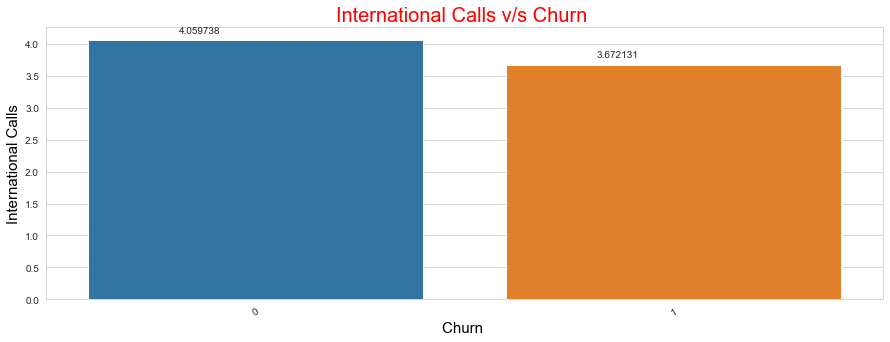

In [128]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_International_Calls'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("International Calls",fontsize=15,color='black')
plt.title("International Calls v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [129]:
data.groupby(by=['Churn'])['clean_International_Charge'].mean()

Churn
0    2.719300
1    2.767579
Name: clean_International_Charge, dtype: float64

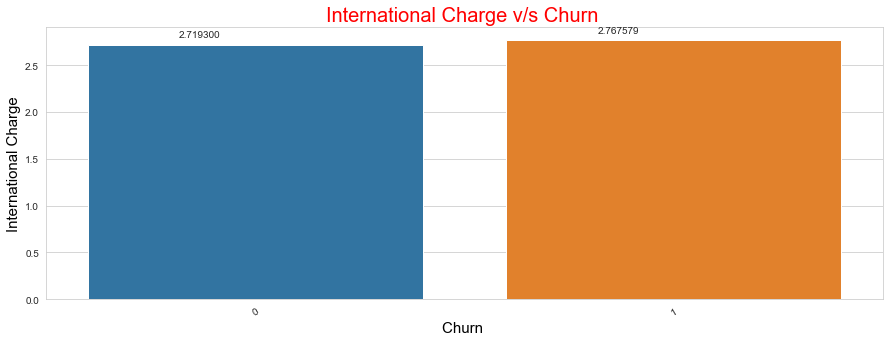

In [130]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_International_Charge'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("International Charge",fontsize=15,color='black')
plt.title("International Charge v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [131]:
data.groupby(by=['Churn'])['clean_CustServ_Calls'].mean()

Churn
0    1.313757
1    1.268657
Name: clean_CustServ_Calls, dtype: float64

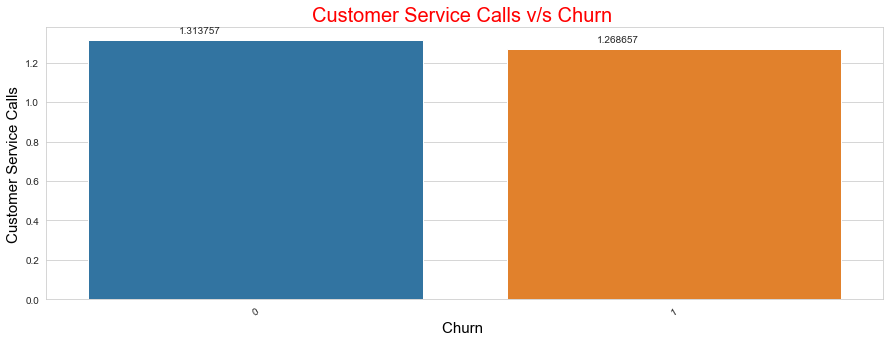

In [132]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['clean_CustServ_Calls'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Customer Service Calls",fontsize=15,color='black')
plt.title("Customer Service Calls v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [133]:
data['Per_Day_Calls']=data['clean_Day_Calls']+data['clean_Eve_Calls']+data['clean_Night_Calls']
data['Per_Day_Calls']

0       300.0
1       329.0
2       328.0
3       248.0
4       356.0
        ...  
4612    315.0
4613    303.0
4614      NaN
4615    311.0
4616    322.0
Name: Per_Day_Calls, Length: 4617, dtype: float64

In [134]:
data['Per_Day_Mins']=data['clean_Day_Mins']+data['clean_Eve_Mins']+data['clean_Night_Mins']
data['Per_Day_Mins']

0         NaN
1       611.5
2       527.2
3         NaN
4       501.9
        ...  
4612    489.8
4613      NaN
4614      NaN
4615    560.7
4616    534.3
Name: Per_Day_Mins, Length: 4617, dtype: float64

In [135]:
data['Per_Day_Charge']=data['clean_Day_Charge']+data['clean_Eve_Charge']+data['clean_Night_Charge']
data['Per_Day_Charge']

0         NaN
1       55.54
2       59.00
3         NaN
4       49.36
        ...  
4612    47.53
4613      NaN
4614      NaN
4615    55.40
4616    54.71
Name: Per_Day_Charge, Length: 4617, dtype: float64

In [136]:
data.head()

,State,International_Plan,VMail_Plan,Churn,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,...,clean_Night_Calls,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge
0,16,0,1,0,128.0,415,25.0,110.0,NaN,NaN,...,91.0,244.7,11.01,3.0,10.0,2.70,1.0,300.0,NaN,NaN
1,35,0,1,0,107.0,415,26.0,123.0,161.6,27.47,...,103.0,254.4,11.45,3.0,13.7,3.70,1.0,329.0,611.5,55.54
2,31,0,0,0,137.0,415,NaN,114.0,243.4,41.38,...,104.0,162.6,7.32,5.0,12.2,3.29,0.0,328.0,527.2,59.00
3,35,1,0,0,84.0,408,NaN,71.0,NaN,NaN,...,89.0,196.9,8.86,7.0,6.6,1.78,2.0,248.0,NaN,NaN
4,36,1,0,0,75.0,415,NaN,113.0,166.7,28.34,...,121.0,186.9,8.41,3.0,10.1,2.73,3.0,356.0,501.9,49.36


In [137]:
data.isna().sum().to_frame().T

,State,International_Plan,VMail_Plan,Churn,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,...,clean_Night_Calls,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge
0,0,0,0,0,678,0,3446,666,693,693,...,641,691,689,341,679,679,368,1697,1807,1805


In [138]:
data.dropna(axis=0,inplace=True)

In [139]:
data.isna().sum().to_frame().T

,State,International_Plan,VMail_Plan,Churn,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,...,clean_Night_Calls,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
data.head()

,State,International_Plan,VMail_Plan,Churn,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,...,clean_Night_Calls,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge
1,35,0,1,0,107.0,415,26.0,123.0,161.6,27.47,...,103.0,254.4,11.45,3.0,13.7,3.70,1.0,329.0,611.5,55.54
26,50,0,1,0,57.0,408,39.0,115.0,213.0,36.21,...,115.0,182.7,8.22,3.0,9.5,2.57,0.0,342.0,586.8,60.67
34,36,0,1,0,57.0,408,25.0,94.0,176.8,30.06,...,116.0,213.5,9.61,4.0,8.3,2.24,0.0,285.0,585.3,56.25
45,37,0,1,0,59.0,408,28.0,97.0,120.9,20.55,...,116.0,163.1,7.34,5.0,8.5,2.30,2.0,305.0,497.0,46.00
65,47,0,1,0,40.0,415,41.0,74.0,148.1,25.18,...,102.0,214.1,9.63,5.0,6.2,1.67,2.0,264.0,531.7,49.22


In [141]:
data.groupby(by=['Churn'])['Per_Day_Calls'].count()

Churn
0    297
1     16
Name: Per_Day_Calls, dtype: int64

In [142]:
data.groupby(by=['Churn'])['Per_Day_Calls'].mean()

Churn
0    293.424242
1    290.437500
Name: Per_Day_Calls, dtype: float64

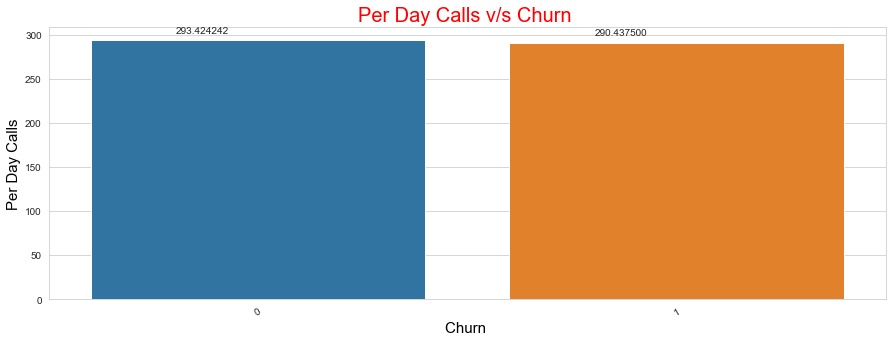

In [143]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['Per_Day_Calls'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Per Day Calls",fontsize=15,color='black')
plt.title("Per Day Calls v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [144]:
data.groupby(by=['Churn'])['Per_Day_Mins'].count()

Churn
0    297
1     16
Name: Per_Day_Mins, dtype: int64

In [145]:
data.groupby(by=['Churn'])['Per_Day_Mins'].mean()

Churn
0    567.813131
1    566.150000
Name: Per_Day_Mins, dtype: float64

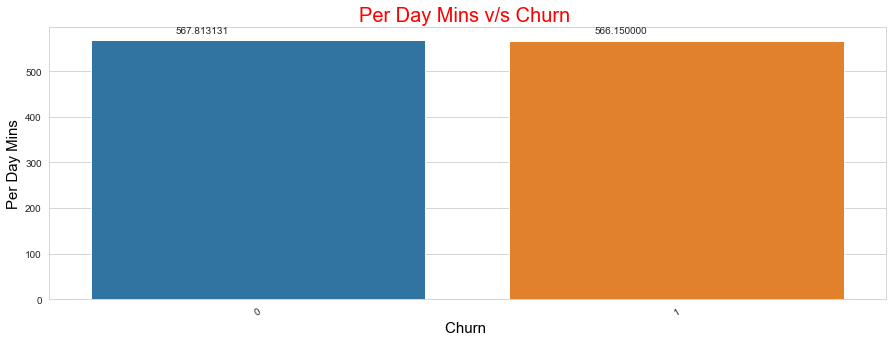

In [146]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['Per_Day_Mins'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Per Day Mins",fontsize=15,color='black')
plt.title("Per Day Mins v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [147]:
data.groupby(by=['Churn'])['Per_Day_Charge'].count()

Churn
0    297
1     16
Name: Per_Day_Charge, dtype: int64

In [148]:
data.groupby(by=['Churn'])['Per_Day_Charge'].mean()

Churn
0    55.134579
1    56.254375
Name: Per_Day_Charge, dtype: float64

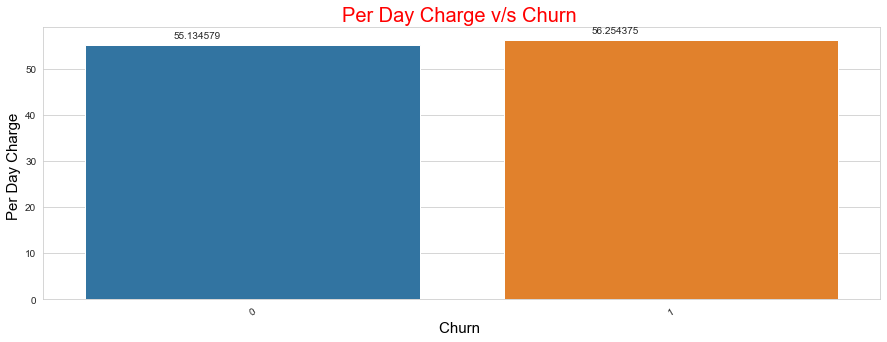

In [149]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data['Churn'],data['Per_Day_Charge'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Churn ",fontsize=15,color='black')
plt.ylabel("Per Day Charge ",fontsize=15,color='black')
plt.title("Per Day Charge v/s Churn ",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

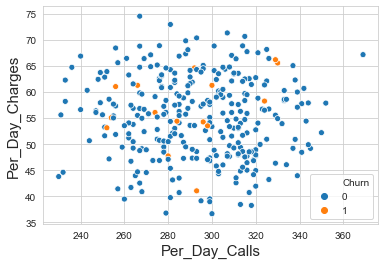

In [150]:
plt.figsize=(25,15)
sns.scatterplot(x='Per_Day_Calls',y='Per_Day_Charge',hue='Churn',data=data)
plt.xlabel('Per_Day_Calls',fontsize=15)
plt.ylabel('Per_Day_Charges',fontsize=15)
plt.legend()

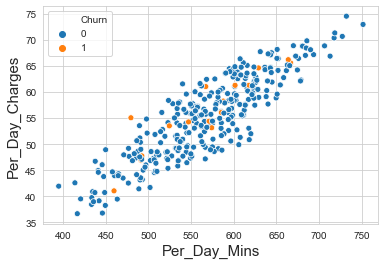

In [151]:
plt.figsize=(25,15)
sns.scatterplot(x='Per_Day_Mins',y='Per_Day_Charge',hue='Churn',data=data)
plt.xlabel('Per_Day_Mins',fontsize=15)
plt.ylabel('Per_Day_Charges',fontsize=15)
plt.legend()

### Categorizing the features with respect to Churn

In [152]:
pd.crosstab(data['Churn'],data['International_Plan'],margins=True)

International_Plan,0,1,All
Churn,,,
0,273,24,297
1,9,7,16
All,282,31,313


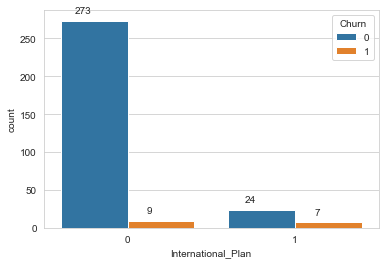

In [153]:
plot=sns.countplot(x='International_Plan',hue='Churn',data=data)
for p in plot.patches:
    plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [154]:
pd.crosstab(data['Churn'],data['clean_CustServ_Calls'],margins=True)

clean_CustServ_Calls,0.0,1.0,2.0,3.0,All
Churn,,,,,
0,58,128,71,40,297
1,4,7,3,2,16
All,62,135,74,42,313


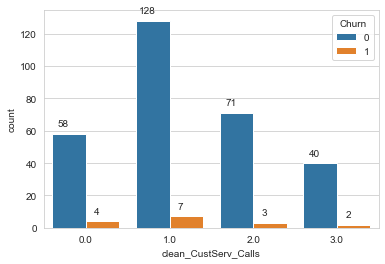

In [155]:
plt.figsize=(25,25)
plt=sns.countplot(x='clean_CustServ_Calls',hue='Churn',data=data)
for p in plt.patches:
    plt.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [156]:
pd.crosstab(data['Churn'],data['clean_Account_Length'],margins=True)

clean_Account_Length,36.0,40.0,41.0,42.0,43.0,45.0,46.0,47.0,48.0,49.0,...,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,All
Churn,,,,,,,,,,,,,,,,,,,,,
0,2,2,3,2,2,2,1,4,2,1,...,1,2,2,2,1,2,1,3,1,297
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,16
All,2,3,3,2,2,2,1,4,2,1,...,1,2,2,2,2,2,2,3,1,313


In [157]:
pd.crosstab(data['Churn'],data['clean_Area_Code'],margins=True)

clean_Area_Code,408,415,510,All
Churn,,,,
0,74,153,70,297
1,6,7,3,16
All,80,160,73,313


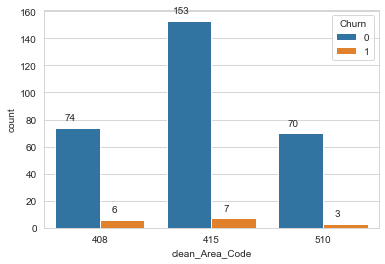

In [158]:
plt.figsize=(25,25)
plt=sns.countplot(x='clean_Area_Code',hue='Churn',data=data)
for p in plt.patches:
    plt.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [159]:
pd.crosstab(data['Churn'],data['VMail_Plan'],margins=True)

VMail_Plan,1,All
Churn,,
0,297,297
1,16,16
All,313,313


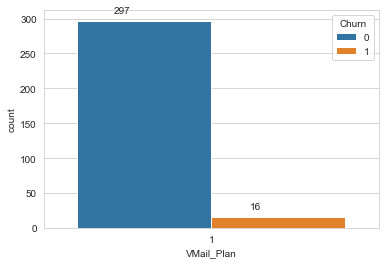

In [160]:
plt.figsize=(25,25)
plt=sns.countplot(x='VMail_Plan',hue='Churn',data=data)
for p in plt.patches:
    plt.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [161]:
pd.crosstab(data['Churn'],data['clean_VMail_Message'],margins=True)

clean_VMail_Message,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,...,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,All
Churn,,,,,,,,,,,,,,,,,,,,,
0,1,1,4,7,3,7,6,13,10,13,...,9,12,13,6,12,5,10,6,8,297
1,0,0,1,0,2,0,0,0,0,0,...,1,1,0,0,0,1,0,1,0,16
All,1,1,5,7,5,7,6,13,10,13,...,10,13,13,6,12,6,10,7,8,313


In [162]:
pd.crosstab(data['Churn'],data['State'],margins=True)

State,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,All
Churn,,,,,,,,,,,,,,,,,,,,,
0,5,4,7,9,1,7,7,5,10,5,...,2,9,5,6,4,6,7,11,6,297
1,0,0,0,0,1,0,0,1,0,1,...,0,2,1,1,0,0,0,0,0,16
All,5,4,7,9,2,7,7,6,10,6,...,2,11,6,7,4,6,7,11,6,313


# <b> 2. Creating Churn risk scores that can be indicative to drive retention campaigns. </b>

## Define X and y variables

In [163]:
X=data[['International_Plan','VMail_Plan', 'clean_VMail_Message','Per_Day_Calls','Per_Day_Mins','Per_Day_Charge',
       'clean_International_Mins', 'clean_International_Calls', 'clean_International_Charge', 'clean_CustServ_Calls']]
y=data.Churn

In [164]:
X.head()

,International_Plan,VMail_Plan,clean_VMail_Message,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge,clean_International_Mins,clean_International_Calls,clean_International_Charge,clean_CustServ_Calls
1,0,1,26.0,329.0,611.5,55.54,13.7,3.0,3.70,1.0
26,0,1,39.0,342.0,586.8,60.67,9.5,3.0,2.57,0.0
34,0,1,25.0,285.0,585.3,56.25,8.3,4.0,2.24,0.0
45,0,1,28.0,305.0,497.0,46.00,8.5,5.0,2.30,2.0
65,0,1,41.0,264.0,531.7,49.22,6.2,5.0,1.67,2.0


In [165]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 1 to 4612
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   International_Plan          313 non-null    int32  
 1   VMail_Plan                  313 non-null    int32  
 2   clean_VMail_Message         313 non-null    float64
 3   Per_Day_Calls               313 non-null    float64
 4   Per_Day_Mins                313 non-null    float64
 5   Per_Day_Charge              313 non-null    float64
 6   clean_International_Mins    313 non-null    float64
 7   clean_International_Calls   313 non-null    float64
 8   clean_International_Charge  313 non-null    float64
 9   clean_CustServ_Calls        313 non-null    float64
dtypes: float64(8), int32(2)
memory usage: 34.5 KB


In [166]:
y.head()

1     0
26    0
34    0
45    0
65    0
Name: Churn, dtype: int32

## Using train-test split

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [169]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (234, 10)
X_test shape =  (79, 10)
y_train shape =  (234,)
y_test shape =  (79,)


# 1) Using Random-Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score

## Define and Train the Model

In [171]:
model=RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=10)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

## Predict the Model

In [172]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

## Generating the confusion matrix and crosstab

In [173]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

[[77  0]
 [ 2  0]]


col_0,0,All
Churn,,
0,77,77
1,2,2
All,79,79


## Finding Accuracy, Precision, Recall, F1-score and Classification Report

In [174]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

Accuracy of Training =  96.15384615384616
Accuracy of Testing =   97.46835443037975
Precision score =  95.00080115366126
Recall score =  97.46835443037975
F1 score =  96.21876014281078
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       0.00      0.00      0.00         2

    accuracy                           0.97        79
   macro avg       0.49      0.50      0.49        79
weighted avg       0.95      0.97      0.96        79



## Churn Risk score

In [175]:
print(model.predict_proba(X))

[[0.75984848 0.24015152]
 [0.979212   0.020788  ]
 [0.97418046 0.02581954]
 [0.99239951 0.00760049]
 [0.99521175 0.00478825]
 [0.87074755 0.12925245]
 [0.98711983 0.01288017]
 [0.93725346 0.06274654]
 [0.97813974 0.02186026]
 [0.97233554 0.02766446]
 [0.98487384 0.01512616]
 [0.99473415 0.00526585]
 [0.98639409 0.01360591]
 [0.98023973 0.01976027]
 [0.98660487 0.01339513]
 [0.94932311 0.05067689]
 [0.98828554 0.01171446]
 [0.96966782 0.03033218]
 [0.97163546 0.02836454]
 [0.96657494 0.03342506]
 [0.99305347 0.00694653]
 [0.73793153 0.26206847]
 [0.96086829 0.03913171]
 [0.99075619 0.00924381]
 [0.97240675 0.02759325]
 [0.78925244 0.21074756]
 [0.98907552 0.01092448]
 [0.98240319 0.01759681]
 [0.95188721 0.04811279]
 [0.9672288  0.0327712 ]
 [0.9735457  0.0264543 ]
 [0.97663859 0.02336141]
 [0.96552036 0.03447964]
 [0.98639409 0.01360591]
 [0.96396492 0.03603508]
 [0.97187996 0.02812004]
 [0.58880678 0.41119322]
 [0.98023973 0.01976027]
 [0.98651142 0.01348858]
 [0.9202966  0.0797034 ]


## Plotting the Receiver Operating Characteristics (ROC) Curve 

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

In [176]:
from sklearn.metrics import roc_curve,roc_auc_score

In [177]:
nostate_probability=[0 for i in range(len(y_test))]
rf_probability=model.predict_proba(X_test)
rf_probability = rf_probability[:, 1]

In [178]:
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
rf_auc=roc_auc_score(y_test,rf_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Random Forest AUC score = %.3f " %(rf_auc))

No state AUC score = 0.500 
Random Forest AUC score = 0.523 


In [179]:
# Calculating roc scores
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
rf_fpr, rf_tpr,i = roc_curve(y_test,y_predict)

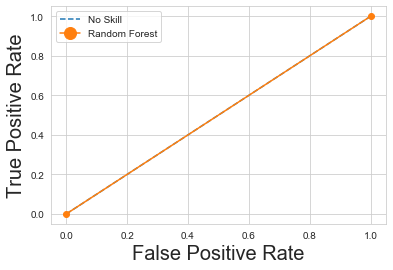

In [180]:
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='o', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Plotting Precision-Recall Curve 

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

In [181]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

Random forest: f1=0.000 auc=0.025


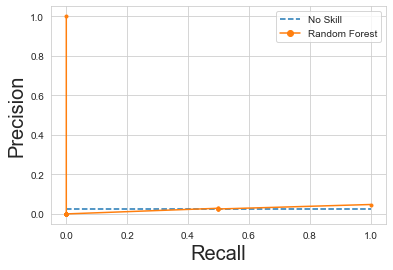

In [182]:
# predict probabilities
rf_probability = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probability = rf_probability[:, 1]
# predict class values
y_predict = model.predict(X_test)
rf_precision, rf_recall,i = precision_recall_curve(y_test, rf_probability)
rf_f1, rf_auc = f1_score(y_test, y_predict), auc(rf_recall, rf_precision)
# summarize scores
print('Random forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# -------------------------------------------------------------------------------------------------------------

# 1.1) Using Synthetic Minority Over-sampling Technique(SMOTE) on Random-Forest Classifier

SMOTE is a technique based on nearest neighbors judged by Euclidean Distance between data points in feature space.

In [183]:
from imblearn.over_sampling import SMOTE

In [184]:
smote=SMOTE(random_state=10)
X_smote, y_smote = smote.fit_sample(X_train,y_train)

In [185]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (234, 10)
X_test shape =  (79, 10)
y_train shape =  (234,)
y_test shape =  (79,)


In [186]:
print("X_smote shape = ",X_smote)

X_smote shape =       International_Plan  VMail_Plan  clean_VMail_Message  Per_Day_Calls  \
0                     0           1            21.000000     318.000000   
1                     0           1            31.000000     272.000000   
2                     0           1            29.000000     257.000000   
3                     0           1            34.000000     289.000000   
4                     1           1            16.000000     255.000000   
..                  ...         ...                  ...            ...   
435                   0           1            26.923757     274.762426   
436                   0           1            31.162481     308.687345   
437                   1           1            31.113665     265.818079   
438                   0           1            37.953972     305.827296   
439                   0           1            25.794700     286.874204   

     Per_Day_Mins  Per_Day_Charge  clean_International_Mins  \
0      522.100000  

In [187]:
print("y_smote shape = ",y_smote)

y_smote shape =  0      0
1      0
2      0
3      0
4      0
      ..
435    1
436    1
437    1
438    1
439    1
Name: Churn, Length: 440, dtype: int32


In [188]:
print(Counter(y_train))
print(Counter(y_smote))

Counter({0: 220, 1: 14})
Counter({0: 220, 1: 220})


In [189]:
print(Counter(X_train))
print('----------------------------------------------------------------------------------------------------------------------')
print(Counter(X_smote))

Counter({'International_Plan': 1, 'VMail_Plan': 1, 'clean_VMail_Message': 1, 'Per_Day_Calls': 1, 'Per_Day_Mins': 1, 'Per_Day_Charge': 1, 'clean_International_Mins': 1, 'clean_International_Calls': 1, 'clean_International_Charge': 1, 'clean_CustServ_Calls': 1})
----------------------------------------------------------------------------------------------------------------------
Counter({'International_Plan': 1, 'VMail_Plan': 1, 'clean_VMail_Message': 1, 'Per_Day_Calls': 1, 'Per_Day_Mins': 1, 'Per_Day_Charge': 1, 'clean_International_Mins': 1, 'clean_International_Calls': 1, 'clean_International_Charge': 1, 'clean_CustServ_Calls': 1})


In [190]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

## Define and Train the Model

In [191]:
model=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=10)
model.fit(X_smote,y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

## Predict the Model

In [192]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

## Generating the confusion matrix and crosstab

In [193]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

[[72  5]
 [ 2  0]]


col_0,0,1,All
Churn,,,
0,72,5,77
1,2,0,2
All,74,5,79


## Finding Accuracy, Precision, Recall, F1-score and Classification report

In [194]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

Accuracy of Training =  100.0
Accuracy of Testing =   91.13924050632912
Precision score =  94.83407458091003
Recall score =  91.13924050632912
F1 score =  92.94995389387208
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        77
           1       0.00      0.00      0.00         2

    accuracy                           0.91        79
   macro avg       0.49      0.47      0.48        79
weighted avg       0.95      0.91      0.93        79



## Churn Risk Score

In [195]:
print(model.predict_proba(X))

[[6.67856187e-01 3.32143813e-01]
 [8.59545455e-01 1.40454545e-01]
 [9.18612046e-01 8.13879541e-02]
 [9.70909091e-01 2.90909091e-02]
 [1.00000000e+00 0.00000000e+00]
 [8.61404762e-01 1.38595238e-01]
 [9.86842105e-01 1.31578947e-02]
 [8.85555556e-01 1.14444444e-01]
 [7.90344828e-01 2.09655172e-01]
 [9.27761095e-01 7.22389052e-02]
 [8.37872671e-01 1.62127329e-01]
 [9.40000000e-01 6.00000000e-02]
 [9.42909091e-01 5.70909091e-02]
 [9.16639024e-01 8.33609756e-02]
 [9.93333333e-01 6.66666667e-03]
 [9.99545455e-01 4.54545455e-04]
 [8.76017208e-01 1.23982792e-01]
 [8.01791376e-01 1.98208624e-01]
 [9.58695252e-01 4.13047479e-02]
 [7.47405098e-01 2.52594902e-01]
 [9.86387560e-01 1.36124402e-02]
 [7.27244206e-02 9.27275579e-01]
 [9.19322055e-01 8.06779449e-02]
 [9.69545455e-01 3.04545455e-02]
 [9.51377015e-01 4.86229852e-02]
 [9.20000000e-01 8.00000000e-02]
 [9.80000000e-01 2.00000000e-02]
 [9.06401657e-01 9.35983431e-02]
 [9.81450216e-01 1.85497835e-02]
 [7.27387664e-01 2.72612336e-01]
 [9.018274

## Plotting ROC Curve

In [196]:
nostate_probability=[0 for i in range(len(y_test))]
rf_probability=model.predict_proba(X_test)
rf_probability = rf_probability[:, 1]

In [197]:
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
rf_auc=roc_auc_score(y_test,rf_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Random Forest AUC score = %.3f " %(rf_auc))

No state AUC score = 0.500 
Random Forest AUC score = 0.656 


In [198]:
# Calculating roc scores
nostate_fpr, nostate_tpr,i = roc_curve(y_test, nostate_probability)
rf_fpr, rf_tpr,i = roc_curve(y_test,y_predict)

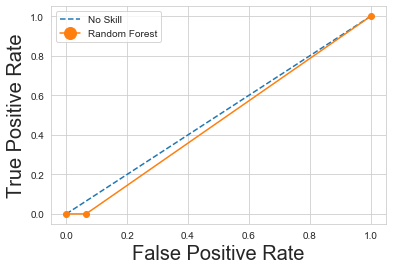

In [199]:
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='o', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Plotting Precision-Recall Curve

Random forest: f1=0.000 auc=0.034


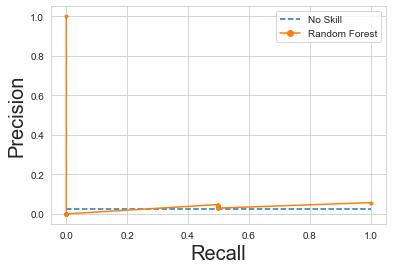

In [200]:
# predict probabilities
rf_probability = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probability = rf_probability[:, 1]
# predict class values
y_predict = model.predict(X_test)
rf_precision, rf_recall,i = precision_recall_curve(y_test, rf_probability)
rf_f1, rf_auc = f1_score(y_test, y_predict), auc(rf_recall, rf_precision)
# summarize scores
print('Random forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# -------------------------------------------------------------------------------------------------------------

# 2)  Using eXtreme Gradient Boosting (XGBoost) Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

<b> Model Features </b>


The implementation of the model supports the features of the scikit-learn and R implementations, with new additions like regularization. 

Three main forms of gradient boosting are supported:

1) Gradient Boosting algorithm also called gradient boosting machine including the learning rate.

2) Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels.

3) Regularized Gradient Boosting with both L1 and L2 regularization.

In [201]:
from xgboost import XGBClassifier

## Define and Train the Model

In [202]:
model=XGBClassifier(max_depth=3,learning_rate=0.01,test_size=0.25,n_estimators=500,n_jobs=1,random_state=5,gamma=0.02,base_score=0.6)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.6, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.02, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=5, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, test_size=0.25,
              tree_method=None, validate_parameters=False, verbosity=None)

Model Feature Importances =  [0.19143823 0.         0.06972554 0.10476309 0.09331038 0.14009401
 0.16580944 0.1330834  0.         0.10177588]


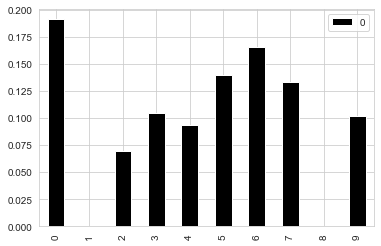

In [203]:
print("Model Feature Importances = " ,model.feature_importances_)
feature_importances=pd.DataFrame(model.feature_importances_)
feature_importances.plot(kind='bar',color='black')

## Predict the Model

In [204]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

## Generating the confusion matrix and crosstab

In [205]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

[[77  0]
 [ 2  0]]


col_0,0,All
Churn,,
0,77,77
1,2,2
All,79,79


## Finding Accuracy, Precision, Recall, F1-score and Classification Report

In [206]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

Accuracy of Training =  97.00854700854701
Accuracy of Testing =   97.46835443037975
Precision score =  95.00080115366126
Recall score =  97.46835443037975
F1 score =  96.21876014281078
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       0.00      0.00      0.00         2

    accuracy                           0.97        79
   macro avg       0.49      0.50      0.49        79
weighted avg       0.95      0.97      0.96        79



## Churn Risk Score

In [207]:
print(model.predict_proba(X_test))

[[0.6004697  0.39953032]
 [0.9753133  0.02468671]
 [0.8834543  0.11654565]
 [0.94067913 0.05932089]
 [0.9805095  0.01949049]
 [0.94512963 0.05487034]
 [0.9839929  0.01600714]
 [0.887473   0.11252699]
 [0.9837392  0.01626082]
 [0.8862542  0.11374581]
 [0.9785647  0.02143532]
 [0.968816   0.03118401]
 [0.9635432  0.03645685]
 [0.9720254  0.02797459]
 [0.9811961  0.01880387]
 [0.98570925 0.01429074]
 [0.6439012  0.35609874]
 [0.7165369  0.2834631 ]
 [0.9776306  0.02236941]
 [0.98234004 0.01765994]
 [0.95935357 0.04064641]
 [0.97646093 0.02353905]
 [0.934188   0.06581202]
 [0.96121055 0.03878947]
 [0.9827012  0.01729882]
 [0.88893133 0.11106868]
 [0.94619256 0.05380745]
 [0.97224975 0.02775028]
 [0.9483231  0.05167693]
 [0.7676612  0.23233882]
 [0.9564212  0.04357878]
 [0.9286364  0.07136361]
 [0.9693714  0.03062859]
 [0.9814068  0.01859317]
 [0.95244205 0.04755794]
 [0.88686967 0.1131303 ]
 [0.98344094 0.01655906]
 [0.9790131  0.02098689]
 [0.92541575 0.07458428]
 [0.9763685  0.02363153]


## Plotting ROC Curve

In [208]:
nostate_probability=[0 for i in range(len(y_test))]
xgb_probability=model.predict_proba(X_test)
xgb_probability = xgb_probability[:, 1]

In [209]:
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
xgb_auc=roc_auc_score(y_test,xgb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("XGBoost AUC score = %.3f " %(xgb_auc))

No state AUC score = 0.500 
XGBoost AUC score = 0.591 


In [210]:
# Calculating roc scores
nostate_fpr, nostate_tpr,i = roc_curve(y_test, nostate_probability)
xgb_fpr, xgb_tpr,i = roc_curve(y_test,y_predict)

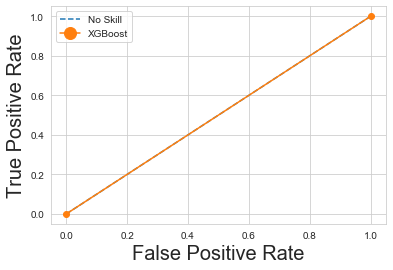

In [211]:
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='o', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Plotting Precision-Recall Curve

XGBoost : f1=0.000 auc=0.029


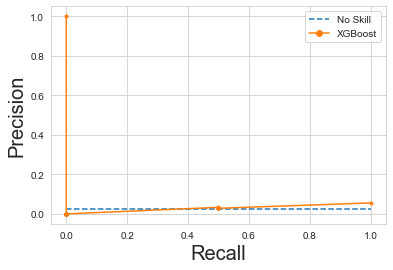

In [212]:
# predict probabilities
xgb_probability = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probability = xgb_probability[:, 1]
# predict class values
y_predict = model.predict(X_test)
xgb_precision, xgb_recall,i = precision_recall_curve(y_test, xgb_probability)
xgb_f1, xgb_auc = f1_score(y_test, y_predict), auc(xgb_recall, xgb_precision)
# summarize scores
print('XGBoost : f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# -------------------------------------------------------------------------------------------------------------

# 2.1) Using Principal Component Analysis (PCA) on eXtreme Gradient Boosting (XGBoost) Classifier

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 

The input data is centered but not scaled for each feature before applying the SVD.

In [213]:
# Import the necessaruy package
from sklearn.decomposition import PCA

# Define the model
pca=PCA(svd_solver='auto',random_state=10)
X=pd.DataFrame(pca.fit_transform(X))
X.head()

pca.explained_variance_ratio_

array([8.52543711e-01, 1.33908757e-01, 9.42592237e-03, 2.56328987e-03,
       7.77930925e-04, 6.00802747e-04, 1.63000915e-04, 1.65834528e-05,
       1.48768898e-09, 2.26515291e-35])

In [214]:
pca.explained_variance_

array([4.45027849e+03, 6.99003761e+02, 4.92033182e+01, 1.33803741e+01,
       4.06079971e+00, 3.13619056e+00, 8.50864837e-01, 8.65656298e-02,
       7.76573700e-06, 1.18240990e-31])

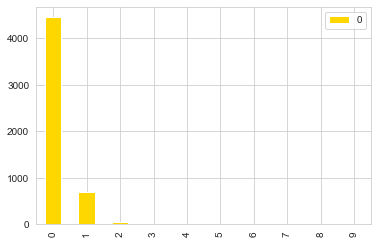

In [215]:
telecom_churn_variance=pd.DataFrame(pca.explained_variance_)
telecom_churn_variance.plot(kind='bar',color='gold')

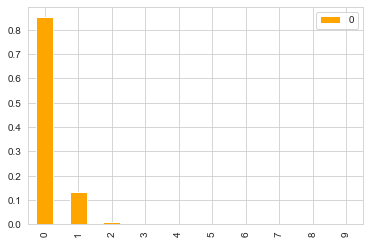

In [216]:
telecom_churn_variance_ratio=pd.DataFrame(pca.explained_variance_ratio_)
telecom_churn_variance_ratio.plot(kind='bar',color='orange')

Model Feature Importances =  [0.19143823 0.         0.06972554 0.10476309 0.09331038 0.14009401
 0.16580944 0.1330834  0.         0.10177588]
[[77  0]
 [ 2  0]]
Accuracy of Training =  97.00854700854701
Accuracy of Testing =   97.46835443037975
Precision score =  95.00080115366126
Recall score =  97.46835443037975
F1 score =  96.21876014281078
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       0.00      0.00      0.00         2

    accuracy                           0.97        79
   macro avg       0.49      0.50      0.49        79
weighted avg       0.95      0.97      0.96        79



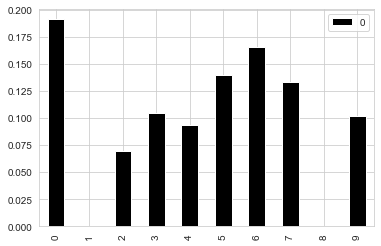

In [217]:
## Train and Predict the Model
model=XGBClassifier(max_depth=3,learning_rate=0.01,test_size=0.25,n_estimators=500,n_jobs=1,random_state=5,gamma=0.02,base_score=0.6)
model.fit(X_train,y_train)

print("Model Feature Importances = " ,model.feature_importances_)
feature_importances=pd.DataFrame(model.feature_importances_)
feature_importances.plot(kind='bar',color='black')

## Predict the Model
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

## Generating the confusion matrix and crosstab 
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

## Calculating accuracy, precision, recall, F1-score and publishing classification report
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

## Churn Risk Score

In [218]:
print(model.predict_proba(X_test))

[[0.6004697  0.39953032]
 [0.9753133  0.02468671]
 [0.8834543  0.11654565]
 [0.94067913 0.05932089]
 [0.9805095  0.01949049]
 [0.94512963 0.05487034]
 [0.9839929  0.01600714]
 [0.887473   0.11252699]
 [0.9837392  0.01626082]
 [0.8862542  0.11374581]
 [0.9785647  0.02143532]
 [0.968816   0.03118401]
 [0.9635432  0.03645685]
 [0.9720254  0.02797459]
 [0.9811961  0.01880387]
 [0.98570925 0.01429074]
 [0.6439012  0.35609874]
 [0.7165369  0.2834631 ]
 [0.9776306  0.02236941]
 [0.98234004 0.01765994]
 [0.95935357 0.04064641]
 [0.97646093 0.02353905]
 [0.934188   0.06581202]
 [0.96121055 0.03878947]
 [0.9827012  0.01729882]
 [0.88893133 0.11106868]
 [0.94619256 0.05380745]
 [0.97224975 0.02775028]
 [0.9483231  0.05167693]
 [0.7676612  0.23233882]
 [0.9564212  0.04357878]
 [0.9286364  0.07136361]
 [0.9693714  0.03062859]
 [0.9814068  0.01859317]
 [0.95244205 0.04755794]
 [0.88686967 0.1131303 ]
 [0.98344094 0.01655906]
 [0.9790131  0.02098689]
 [0.92541575 0.07458428]
 [0.9763685  0.02363153]


## Plotting ROC Curve

No state AUC score = 0.500 
XGBoost AUC score = 0.591 


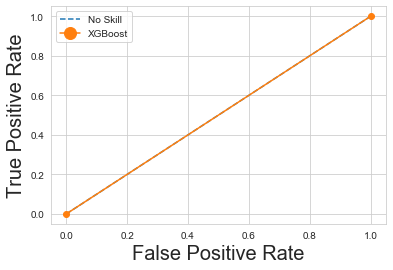

In [219]:
nostate_probability=[0 for i in range(len(y_test))]
xgb_probability=model.predict_proba(X_test)
xgb_probability = xgb_probability[:, 1]

# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
xgb_auc=roc_auc_score(y_test,xgb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("XGBoost AUC score = %.3f " %(xgb_auc))

# Calculating roc scores
nostate_fpr, nostate_tpr,i = roc_curve(y_test, nostate_probability)
xgb_fpr, xgb_tpr,i = roc_curve(y_test,y_predict)

# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill',scalex=True, scaley=True)
pyplot.plot(xgb_fpr, xgb_tpr, marker='o', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()


## Plotting Precision-Recall Curve

XGBoost : f1=0.000 auc=0.029


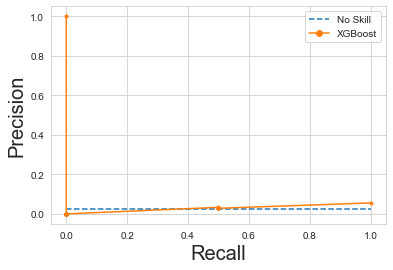

In [220]:
# predict probabilities
xgb_probability = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probability = xgb_probability[:, 1]
# predict class values
y_predict = model.predict(X_test)
xgb_precision, xgb_recall,i = precision_recall_curve(y_test, xgb_probability)
xgb_f1, xgb_auc = f1_score(y_test, y_predict), auc(xgb_recall, xgb_precision)
# summarize scores
print('XGBoost : f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# -------------------------------------------------------------------------------------------------------------

# 3) Using Gradient Boosting Classifier

Gradient Boosting builds an additive model in a forward stage-wise 

It allows for the optimization of arbitrary differentiable loss functions.

In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function.

Binary classification is a special case where only a single regression tree is induced.

In [221]:
from sklearn.ensemble import GradientBoostingClassifier

## Define and Train the Model

In [222]:
model=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0,max_depth=3,random_state=5)
model.fit(X_train,y_train)
print(" Model Feature Importances = " ,model.feature_importances_)

 Model Feature Importances =  [0.11890448 0.         0.05881495 0.09072558 0.18167253 0.077023
 0.11285226 0.2127319  0.14603992 0.00123538]


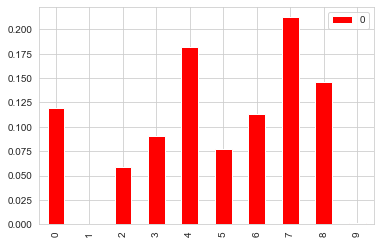

In [223]:
feature_importances=pd.DataFrame(model.feature_importances_)
feature_importances.plot(kind='bar',color='red')

## Predict the Model

In [224]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

## Generating the confusion matrix and crosstab

In [225]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

[[73  4]
 [ 2  0]]


col_0,0,1,All
Churn,,,
0,73,4,77
1,2,0,2
All,75,4,79


## Finding Accuracy, Precision, Recall, F1-score and Classification Report

In [226]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

Accuracy of Training =  100.0
Accuracy of Testing =   92.40506329113924
Precision score =  94.86919831223629
Recall score =  92.40506329113924
F1 score =  93.62091938707529
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        77
           1       0.00      0.00      0.00         2

    accuracy                           0.92        79
   macro avg       0.49      0.47      0.48        79
weighted avg       0.95      0.92      0.94        79



## Churn Risk Score

In [227]:
print(model.predict_proba(X))

[[0.00336865 0.99663135]
 [0.00336865 0.99663135]
 [0.00336865 0.99663135]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.00336865 0.99663135]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.00336865 0.99663135]
 [0.00336865 0.99663135]
 [0.00336865 0.99663135]
 [0.00336865 0.99663135]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.00336865 0.99663135]
 [0.00336865 0.99663135]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.00336865 0.99663135]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.00336865 0.99663135]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.00336865 0.99663135]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.00336865 0.99663135]
 [0.00336865 0.99663135]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.72684779 0.27315221]
 [0.00336865 0.99663135]
 [0.72684779 0.27315221]


## Plotting ROC Curve

In [228]:
nostate_probability=[0 for i in range(len(y_test))]
gb_probability=model.predict_proba(X_test)
gb_probability = gb_probability[:, 1]

In [229]:
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
gb_auc=roc_auc_score(y_test,gb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Gradient Boosting AUC score = %.3f " %(gb_auc))

No state AUC score = 0.500 
Gradient Boosting AUC score = 0.438 


In [230]:
# Calculating roc scores
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
gb_fpr, gb_tpr,i = roc_curve(y_test,y_predict)

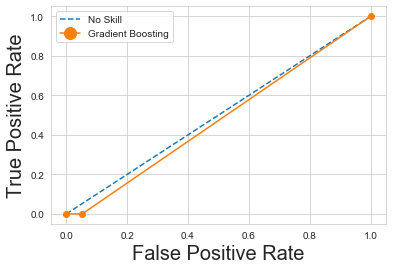

In [231]:
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, marker='o', label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Plotting Precision-Recall Curve

Gradient Boosting: f1=0.000 auc=0.021


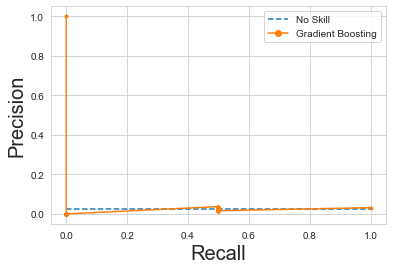

In [232]:
# predict probabilities
gb_probability = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
gb_probability = gb_probability[:, 1]
# predict class values
y_predict = model.predict(X_test)
gb_precision, gb_recall,i = precision_recall_curve(y_test, gb_probability)
gb_f1, gb_auc = f1_score(y_test, y_predict), auc(gb_recall, gb_precision)
# summarize scores
print('Gradient Boosting: f1=%.3f auc=%.3f' % (gb_f1, gb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(gb_recall, gb_precision, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# -------------------------------------------------------------------------------------------------------------

# 3.1) Using GridSearch Cross Validation on Gradient Boosting Classifier

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [233]:
# Import the necessary package
from sklearn.model_selection import GridSearchCV

model=GradientBoostingClassifier(n_estimators=10,random_state=5)
parameters={'min_samples_split': [2,3,4,5],'min_samples_leaf':[1,2,3],
              'n_estimators':[10,20],'random_state' : [5]}
grid=GridSearchCV(model,parameters,scoring='accuracy',cv=15)
grid.fit(X_train,y_train)


grid.best_params_
grid.best_score_
## Predict the Model
y_train_predict=grid.predict(X_train)
y_predict=grid.predict(X_test)

## Generating confusion matrix and crosstab
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

## Calculating accuracy, precision, recall, F1-score and publishing classification report
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[74  3]
 [ 2  0]]
Accuracy of Training =  97.00854700854701
Accuracy of Testing =   93.67088607594937
Precision score =  94.90339773484344
Recall score =  93.67088607594937
F1 score =  94.28311408951767
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.00      0.00      0.00         2

    accuracy                           0.94        79
   macro avg       0.49      0.48      0.48        79
weighted avg       0.95      0.94      0.94        79



## Churn Risk Score

In [234]:
print(grid.predict_proba(X))

[[0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]


## Plotting ROC Curve

No state AUC score = 0.500 
Gradient Boosting AUC score = 0.393 


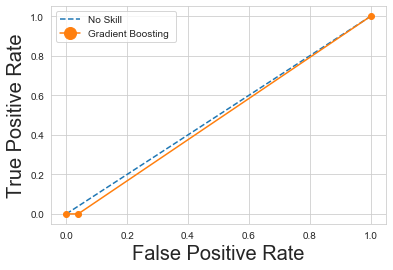

In [235]:
nostate_probability=[0 for i in range(len(y_test))]
gb_probability=grid.predict_proba(X_test)
gb_probability = gb_probability[:, 1]

# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
gb_auc=roc_auc_score(y_test,gb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Gradient Boosting AUC score = %.3f " %(gb_auc))

# Calculating roc scores
nostate_fpr, nostate_tpr,i = roc_curve(y_test, nostate_probability)
gb_fpr, gb_tpr,i = roc_curve(y_test,y_predict)

# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill',scalex=True, scaley=True)
pyplot.plot(gb_fpr, gb_tpr, marker='o', label='Gradient Boosting ')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Plotting Precision-Recall Curve

Gradient Boosting : f1=0.000 auc=0.020


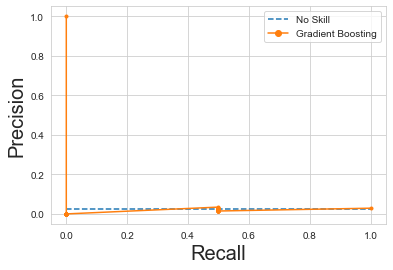

In [236]:
# predict probabilities
gb_probability = grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
gb_probability = gb_probability[:, 1]
# predict class values
y_predict = grid.predict(X_test)
gb_precision,gb_recall,i = precision_recall_curve(y_test, gb_probability)
gb_f1, gb_auc = f1_score(y_test, y_predict), auc(gb_recall, gb_precision)
# summarize scores
print('Gradient Boosting : f1=%.3f auc=%.3f' % (gb_f1, gb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(gb_recall, gb_precision, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# -------------------------------------------------------------------------------------------------------------

# 3.2) Using RandomizedSearch Cross Validation on Gradient Boosting Classifier

RandomizedSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, only a fixed number of parameter settings is sampled from the specified distributions. 

If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. 

In [237]:
# Import the necessary package
from sklearn.model_selection import RandomizedSearchCV

model=GradientBoostingClassifier(n_estimators=10,random_state=5)
parameters={'min_samples_split': [2,3,4,5],'min_samples_leaf':[1,2,3],
              'n_estimators':[10,20],'random_state' : [5]}
randomized=RandomizedSearchCV(model,parameters,scoring='accuracy',cv=15)
randomized.fit(X_train,y_train)


randomized.best_params_
randomized.best_score_
## Predict the Model
y_train_predict=randomized.predict(X_train)
y_predict=randomized.predict(X_test)

## Generating confusion matrix and crosstab
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

## Calculating accuracy, precision, recall, F1-score and publishing classification report
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[74  3]
 [ 2  0]]
Accuracy of Training =  97.00854700854701
Accuracy of Testing =   93.67088607594937
Precision score =  94.90339773484344
Recall score =  93.67088607594937
F1 score =  94.28311408951767
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.00      0.00      0.00         2

    accuracy                           0.94        79
   macro avg       0.49      0.48      0.48        79
weighted avg       0.95      0.94      0.94        79



## Churn Risk Score 

In [238]:
print(randomized.predict_proba(X))

[[0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.87988283 0.12011717]
 [0.13511733 0.86488267]
 [0.87988283 0.12011717]


## Plotting ROC Curve

No state AUC score = 0.500 
Gradient Boosting AUC score = 0.393 


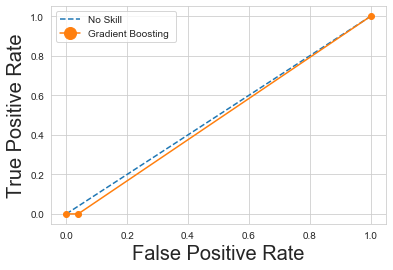

In [239]:
nostate_probability=[0 for i in range(len(y_test))]
gb_probability=grid.predict_proba(X_test)
gb_probability = gb_probability[:, 1]

# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
gb_auc=roc_auc_score(y_test,gb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Gradient Boosting AUC score = %.3f " %(gb_auc))

# Calculating roc scores
nostate_fpr, nostate_tpr,i = roc_curve(y_test, nostate_probability)
gb_fpr, gb_tpr,i = roc_curve(y_test,y_predict)

# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill',scalex=True, scaley=True)
pyplot.plot(gb_fpr, gb_tpr, marker='o', label='Gradient Boosting ')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Plotting Precision-Recall Curve

Gradient Boosting : f1=0.000 auc=0.020


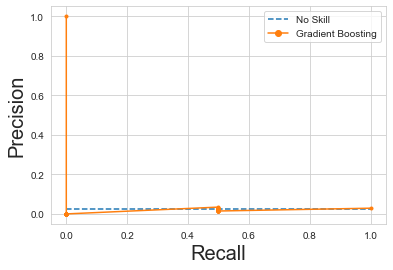

In [240]:
# predict probabilities
gb_probability = grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
gb_probability = gb_probability[:, 1]
# predict class values
y_predict = grid.predict(X_test)
gb_precision,gb_recall,i = precision_recall_curve(y_test, gb_probability)
gb_f1, gb_auc = f1_score(y_test, y_predict), auc(gb_recall, gb_precision)
# summarize scores
print('Gradient Boosting : f1=%.3f auc=%.3f' % (gb_f1, gb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(gb_recall, gb_precision, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# -------------------------------------------------------------------------------------------------------------

# 4) Using Decision Tree Classifier

It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

Decision Tree consists of :

Nodes : Test for the value of a certain attribute.

Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.

Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution).

In [241]:
from sklearn.tree import DecisionTreeClassifier

## Define and Train the Model

In [242]:
model=DecisionTreeClassifier(splitter='best',random_state=5, min_samples_split=3,max_depth=4,
    min_samples_leaf=3,criterion='gini')
model.fit(X_train,y_train)
print("Model Feature Importances = " ,model.feature_importances_)

Model Feature Importances =  [0.1946753  0.         0.00995856 0.         0.02998514 0.
 0.34536272 0.39409252 0.02592576 0.        ]


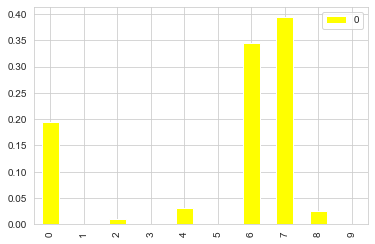

In [243]:
feature_importances=pd.DataFrame(model.feature_importances_)
feature_importances.plot(kind='bar',color='yellow')

## Predict the Model

In [244]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

## Generating the confusion matrix and crosstab

In [245]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

[[76  1]
 [ 2  0]]


col_0,0,1,All
Churn,,,
0,76,1,77
1,2,0,2
All,78,1,79


## Finding Accuracy, Precision, Recall, F1-score and Classification Report

In [246]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

Accuracy of Training =  97.00854700854701
Accuracy of Testing =   96.20253164556962
Precision score =  94.9691658552418
Recall score =  96.20253164556962
F1 score =  95.58187015108206
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        77
           1       0.00      0.00      0.00         2

    accuracy                           0.96        79
   macro avg       0.49      0.49      0.49        79
weighted avg       0.95      0.96      0.96        79



## Churn Risk Score

In [247]:
print(model.predict_proba(X))

[[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.         1.        ]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.         1.        ]
 [0.         1.        ]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.         1.        ]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.         1.        ]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.         1.        ]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.         1.        ]
 [0.         1.        ]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.95238095 0.04761905]
 [0.         1.        ]
 [0.95238095 0.04761905]


## Plotting ROC Curve

In [248]:
nostate_probability=[0 for i in range(len(y_test))]
dt_probability=model.predict_proba(X_test)
dt_probability = dt_probability[:, 1]

In [249]:
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
dt_auc=roc_auc_score(y_test,dt_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Decision Tree AUC score = %.3f " %(dt_auc))

No state AUC score = 0.500 
Decision Tree AUC score = 0.409 


In [250]:
# Calculating roc scores
nostate_fpr, nostate_tpr,i = roc_curve(y_test, nostate_probability)
dt_fpr, dt_tpr,i = roc_curve(y_test,y_predict)

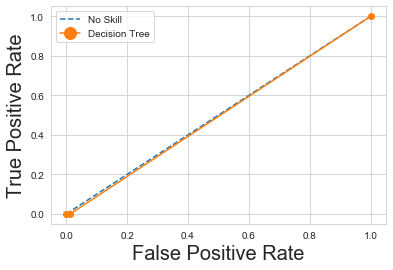

In [251]:
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='o', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Plotting Precision-Recall Curve

Decision Tree: f1=0.000 auc=0.014


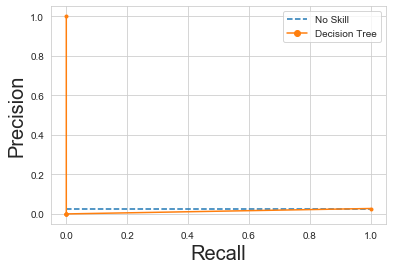

In [252]:
# predict probabilities
dt_probability = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probability = dt_probability[:, 1]
# predict class values
y_predict = model.predict(X_test)
dt_precision, dt_recall,i = precision_recall_curve(y_test, dt_probability)
dt_f1, dt_auc = f1_score(y_test, y_predict), auc(dt_recall, dt_precision)
# summarize scores
print('Decision Tree: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# -------------------------------------------------------------------------------------------------------------

# 5) Using Extra Trees Classifier

This class implements a meta estimator that fits a number of randomized decision trees on various sub-samples of the dataset.
It also uses averaging to improve the predictive accuracy and control over-fitting.

 Model Feature Importances =  [0.34700483 0.         0.08516697 0.04279665 0.05366071 0.04134231
 0.14645207 0.11277162 0.10156739 0.06923744]
[[77  0]
 [ 2  0]]
Accuracy score of Training =  94.44444444444444
Accuracy score of Testing =  97.46835443037975
Precision score =  95.00080115366126
Recall score =  97.46835443037975
F1 score =  96.21876014281078
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       0.00      0.00      0.00         2

    accuracy                           0.97        79
   macro avg       0.49      0.50      0.49        79
weighted avg       0.95      0.97      0.96        79



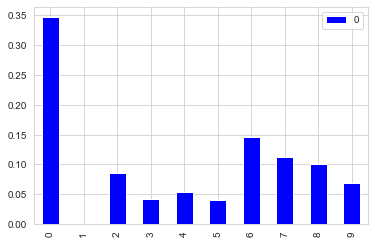

In [253]:
from sklearn.ensemble import ExtraTreesClassifier 
model=ExtraTreesClassifier(n_estimators=100,criterion='gini',random_state=5,max_depth=3,bootstrap=True)
model.fit(X_train,y_train)
print(" Model Feature Importances = " ,model.feature_importances_)
feature_importances=pd.DataFrame(model.feature_importances_)
feature_importances.plot(kind='bar',color='blue')
y_train_predict=model.predict(X_train)
y_predict= model.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

## Plotting ROC Curve

No state AUC score = 0.500 
Extra Tree AUC score = 0.273 


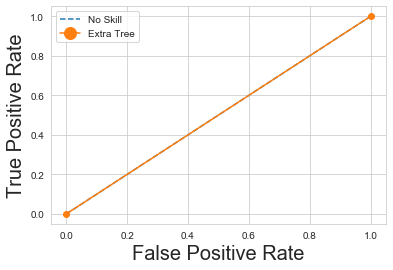

In [254]:
nostate_probability=[0 for i in range(len(y_test))]
et_probability=model.predict_proba(X_test)
et_probability = et_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
et_auc=roc_auc_score(y_test,et_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Extra Tree AUC score = %.3f " %(et_auc))
# Calculating roc scores
nostate_fpr, nostate_tpr,i = roc_curve(y_test, nostate_probability)
et_fpr, et_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(et_fpr, et_tpr, marker='o', label='Extra Tree')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Plotting Precision-Recall Curve

Extra Tree: f1=0.000 auc=0.017


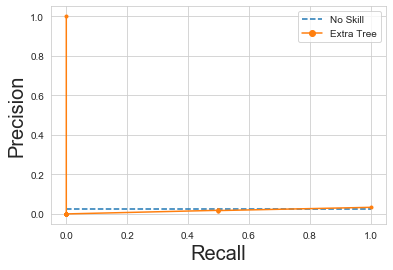

In [255]:
# predict probabilities
et_probability = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
et_probability = et_probability[:, 1]
# predict class values
y_predict = model.predict(X_test)
et_precision, et_recall,i = precision_recall_curve(y_test, et_probability)
et_f1, et_auc = f1_score(y_test, y_predict), auc(et_recall, et_precision)
# summarize scores
print('Extra Tree: f1=%.3f auc=%.3f' % (et_f1, et_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(et_recall, et_precision, marker='.', label='Extra Tree')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# -------------------------------------------------------------------------------------------------------------

# 5) Using Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [256]:
from sklearn.linear_model import LogisticRegression

In [257]:
# Define the Model
lr=LogisticRegression(random_state=5,C=2.0,multi_class='ovr')
lr.fit(X_train,y_train)

# Predict the Model
y_train_predict=model.predict(X_train)
y_predict= model.predict(X_test)

# Calculate confusion matrix, crosstab
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

# Finding accuracy, precision, recall, F1-score, classification report
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[77  0]
 [ 2  0]]
Accuracy score of Training =  94.44444444444444
Accuracy score of Testing =  97.46835443037975
Precision score =  95.00080115366126
Recall score =  97.46835443037975
F1 score =  96.21876014281078
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       0.00      0.00      0.00         2

    accuracy                           0.97        79
   macro avg       0.49      0.50      0.49        79
weighted avg       0.95      0.97      0.96        79



## Plotting ROC Curve

No state AUC score = 0.500 
Logistic Regression AUC score = 0.273 


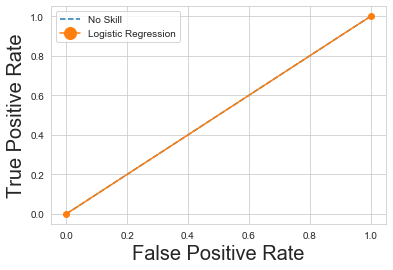

In [258]:
nostate_probability=[0 for i in range(len(y_test))]
lr_probability=model.predict_proba(X_test)
lr_probability = lr_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
lr_auc=roc_auc_score(y_test,lr_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Logistic Regression AUC score = %.3f " %(lr_auc))
# Calculating roc scores
nostate_fpr, nostate_tpr,i = roc_curve(y_test, nostate_probability)
lr_fpr, lr_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='o', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Plotting Precision-Recall Curve

Logistic Regression: f1=0.000 auc=0.017


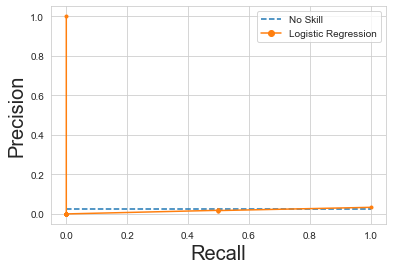

In [259]:
# predict probabilities
lr_probability = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probability = lr_probability[:, 1]
# predict class values
y_predict = model.predict(X_test)
lr_precision, lr_recall,i = precision_recall_curve(y_test, lr_probability)
lr_f1, lr_auc = f1_score(y_test, y_predict), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='upper-right',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# ---------------------------------------------------------------------------------------------------------

## Using K-folds cross validation on Decision Tree Classifier

Cross-validation is a statistical method used to estimate the skill of machine learning models.

K-fold cross validation is a procedure used to estimate the skill of the model on new data.


In [260]:
from sklearn.model_selection import cross_val_score

In [261]:
model=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=11,max_depth=16)
score=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print(score*100)

[ 84.375       93.75        93.75        90.32258065  83.87096774
  90.32258065 100.          96.77419355  90.32258065  90.32258065]


In [262]:
print(score.mean()*100)

91.38104838709677


In [263]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [264]:
model.feature_importances_

array([0.08352366, 0.11197391, 0.01037334, 0.02963718, 0.22747656,
       0.0329335 , 0.09660494, 0.28723915, 0.12023777, 0.        ])

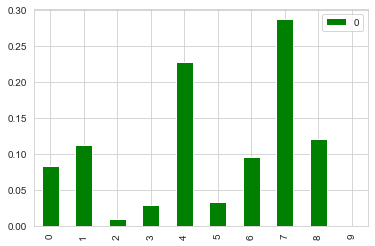

In [265]:
feature_importances=pd.DataFrame(model.feature_importances_)
feature_importances.plot(kind='bar',color='green')

# -------------------------------------------------------------------------------------------------------------

## Stratified K-Fold Cross Validation

This type of cross validation provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [266]:
from sklearn.model_selection import StratifiedKFold

In [267]:
accuracy=[]
Stratified_K_fold=StratifiedKFold(n_splits=10)
for train_index,test_index in Stratified_K_fold.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    model.fit(X_train,y_train)
    y_train_predict=model.predict(X_train)
    y_predict=model.predict(X_test)
    score_train=accuracy_score(y_train,y_train_predict)
    score=accuracy_score(y_test,y_predict)
    accuracy_train=accuracy.append(score_train)
    accuracy_test=accuracy.append(score)

print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_predict)*100)

print(accuracy)
print(sum(accuracy)/len(accuracy)*100)

Accuracy of Training =  100.0
Accuracy of Testing =  90.32258064516128
[1.0, 0.84375, 1.0, 0.9375, 1.0, 0.9375, 1.0, 0.9032258064516129, 1.0, 0.8387096774193549, 1.0, 0.9032258064516129, 1.0, 1.0, 1.0, 0.967741935483871, 1.0, 0.9032258064516129, 1.0, 0.9032258064516129]
95.69052419354837


# -------------------------------------------------------------------------------------------------------------

# <b> 3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offer can be targeted to Churn YES customers.</b>

In [268]:
data.head()

,State,International_Plan,VMail_Plan,Churn,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,...,clean_Night_Calls,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge
1,35,0,1,0,107.0,415,26.0,123.0,161.6,27.47,...,103.0,254.4,11.45,3.0,13.7,3.70,1.0,329.0,611.5,55.54
26,50,0,1,0,57.0,408,39.0,115.0,213.0,36.21,...,115.0,182.7,8.22,3.0,9.5,2.57,0.0,342.0,586.8,60.67
34,36,0,1,0,57.0,408,25.0,94.0,176.8,30.06,...,116.0,213.5,9.61,4.0,8.3,2.24,0.0,285.0,585.3,56.25
45,37,0,1,0,59.0,408,28.0,97.0,120.9,20.55,...,116.0,163.1,7.34,5.0,8.5,2.30,2.0,305.0,497.0,46.00
65,47,0,1,0,40.0,415,41.0,74.0,148.1,25.18,...,102.0,214.1,9.63,5.0,6.2,1.67,2.0,264.0,531.7,49.22


In [269]:
data.tail()

,State,International_Plan,VMail_Plan,Churn,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,...,clean_Night_Calls,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge
4585,17,0,1,0,140.0,408,24.0,92.0,235.4,40.02,...,99.0,211.9,9.54,2.0,8.9,2.40,3.0,262.0,608.2,63.24
4586,50,1,1,0,46.0,510,27.0,73.0,170.9,29.05,...,94.0,130.8,5.89,7.0,6.1,1.65,2.0,244.0,486.4,50.64
4588,18,0,1,0,81.0,415,43.0,102.0,102.4,17.41,...,97.0,182.3,8.20,5.0,7.1,1.92,2.0,303.0,510.0,44.76
4596,19,0,1,0,92.0,408,21.0,107.0,227.8,38.73,...,72.0,259.7,11.69,3.0,12.4,3.35,0.0,249.0,643.9,63.71
4612,34,0,1,0,57.0,510,25.0,81.0,144.0,24.48,...,122.0,158.6,7.14,6.0,8.5,2.30,3.0,315.0,489.8,47.53


In [270]:
Counter(data.Churn)

Counter({0: 297, 1: 16})

In [271]:
data['CHURN_FLAG'] = data['Churn']

In [272]:
data.head()

,State,International_Plan,VMail_Plan,Churn,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,...,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge,CHURN_FLAG
1,35,0,1,0,107.0,415,26.0,123.0,161.6,27.47,...,254.4,11.45,3.0,13.7,3.70,1.0,329.0,611.5,55.54,0
26,50,0,1,0,57.0,408,39.0,115.0,213.0,36.21,...,182.7,8.22,3.0,9.5,2.57,0.0,342.0,586.8,60.67,0
34,36,0,1,0,57.0,408,25.0,94.0,176.8,30.06,...,213.5,9.61,4.0,8.3,2.24,0.0,285.0,585.3,56.25,0
45,37,0,1,0,59.0,408,28.0,97.0,120.9,20.55,...,163.1,7.34,5.0,8.5,2.30,2.0,305.0,497.0,46.00,0
65,47,0,1,0,40.0,415,41.0,74.0,148.1,25.18,...,214.1,9.63,5.0,6.2,1.67,2.0,264.0,531.7,49.22,0


In [273]:
Counter(data.CHURN_FLAG)

Counter({0: 297, 1: 16})

In [274]:
data.drop(labels='Churn',axis=1,inplace=True)

In [275]:
data.head()

,State,International_Plan,VMail_Plan,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,clean_Eve_Calls,...,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge,CHURN_FLAG
1,35,0,1,107.0,415,26.0,123.0,161.6,27.47,103.0,...,254.4,11.45,3.0,13.7,3.70,1.0,329.0,611.5,55.54,0
26,50,0,1,57.0,408,39.0,115.0,213.0,36.21,112.0,...,182.7,8.22,3.0,9.5,2.57,0.0,342.0,586.8,60.67,0
34,36,0,1,57.0,408,25.0,94.0,176.8,30.06,75.0,...,213.5,9.61,4.0,8.3,2.24,0.0,285.0,585.3,56.25,0
45,37,0,1,59.0,408,28.0,97.0,120.9,20.55,92.0,...,163.1,7.34,5.0,8.5,2.30,2.0,305.0,497.0,46.00,0
65,47,0,1,40.0,415,41.0,74.0,148.1,25.18,88.0,...,214.1,9.63,5.0,6.2,1.67,2.0,264.0,531.7,49.22,0


In [276]:
data.head()

,State,International_Plan,VMail_Plan,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,clean_Eve_Calls,...,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge,CHURN_FLAG
1,35,0,1,107.0,415,26.0,123.0,161.6,27.47,103.0,...,254.4,11.45,3.0,13.7,3.70,1.0,329.0,611.5,55.54,0
26,50,0,1,57.0,408,39.0,115.0,213.0,36.21,112.0,...,182.7,8.22,3.0,9.5,2.57,0.0,342.0,586.8,60.67,0
34,36,0,1,57.0,408,25.0,94.0,176.8,30.06,75.0,...,213.5,9.61,4.0,8.3,2.24,0.0,285.0,585.3,56.25,0
45,37,0,1,59.0,408,28.0,97.0,120.9,20.55,92.0,...,163.1,7.34,5.0,8.5,2.30,2.0,305.0,497.0,46.00,0
65,47,0,1,40.0,415,41.0,74.0,148.1,25.18,88.0,...,214.1,9.63,5.0,6.2,1.67,2.0,264.0,531.7,49.22,0


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 1 to 4612
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State                       313 non-null    int32  
 1   International_Plan          313 non-null    int32  
 2   VMail_Plan                  313 non-null    int32  
 3   clean_Account_Length        313 non-null    float64
 4   clean_Area_Code             313 non-null    int64  
 5   clean_VMail_Message         313 non-null    float64
 6   clean_Day_Calls             313 non-null    float64
 7   clean_Day_Mins              313 non-null    float64
 8   clean_Day_Charge            313 non-null    float64
 9   clean_Eve_Calls             313 non-null    float64
 10  clean_Eve_Mins              313 non-null    float64
 11  clean_Eve_Charge            313 non-null    float64
 12  clean_Night_Calls           313 non-null    float64
 13  clean_Night_Mins            313 no

In [278]:
data.isna().sum().to_frame().T

,State,International_Plan,VMail_Plan,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,clean_Eve_Calls,...,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge,CHURN_FLAG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
data.columns

Index(['State', 'International_Plan', 'VMail_Plan', 'clean_Account_Length',
       'clean_Area_Code', 'clean_VMail_Message', 'clean_Day_Calls',
       'clean_Day_Mins', 'clean_Day_Charge', 'clean_Eve_Calls',
       'clean_Eve_Mins', 'clean_Eve_Charge', 'clean_Night_Calls',
       'clean_Night_Mins', 'clean_Night_Charge', 'clean_International_Calls',
       'clean_International_Mins', 'clean_International_Charge',
       'clean_CustServ_Calls', 'Per_Day_Calls', 'Per_Day_Mins',
       'Per_Day_Charge', 'CHURN_FLAG'],
      dtype='object')

In [280]:
data.dtypes

State                           int32
International_Plan              int32
VMail_Plan                      int32
clean_Account_Length          float64
clean_Area_Code                 int64
clean_VMail_Message           float64
clean_Day_Calls               float64
clean_Day_Mins                float64
clean_Day_Charge              float64
clean_Eve_Calls               float64
clean_Eve_Mins                float64
clean_Eve_Charge              float64
clean_Night_Calls             float64
clean_Night_Mins              float64
clean_Night_Charge            float64
clean_International_Calls     float64
clean_International_Mins      float64
clean_International_Charge    float64
clean_CustServ_Calls          float64
Per_Day_Calls                 float64
Per_Day_Mins                  float64
Per_Day_Charge                float64
CHURN_FLAG                      int32
dtype: object

In [281]:
data.describe()

,State,International_Plan,VMail_Plan,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,clean_Eve_Calls,...,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge,CHURN_FLAG
count,313.000000,313.000000,313.0,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,...,313.000000,313.000000,313.00000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,25.210863,0.099042,1.0,94.654952,435.367412,29.750799,97.520767,175.011821,29.752556,98.242812,...,198.540575,8.934345,3.86901,10.144409,2.739489,1.306709,293.271565,567.728115,55.191821,0.051118
std,14.950997,0.299196,0.0,29.697445,41.328218,7.017049,14.188307,41.109394,6.988681,14.581727,...,38.223268,1.720350,1.78098,1.950980,0.526759,0.938076,26.434966,66.359160,7.758263,0.220591
min,0.000000,0.000000,1.0,36.000000,408.000000,14.000000,67.000000,92.700000,15.760000,67.000000,...,117.800000,5.300000,1.00000,5.800000,1.570000,0.000000,230.000000,394.900000,36.650000,0.000000
25%,12.000000,0.000000,1.0,70.000000,408.000000,25.000000,87.000000,143.400000,24.380000,88.000000,...,168.700000,7.590000,3.00000,8.600000,2.320000,1.000000,275.000000,523.500000,49.110000,0.000000
50%,25.000000,0.000000,1.0,95.000000,415.000000,30.000000,99.000000,176.800000,30.060000,99.000000,...,200.400000,9.020000,4.00000,10.200000,2.750000,1.000000,295.000000,568.400000,55.590000,0.000000
75%,38.000000,0.000000,1.0,119.000000,415.000000,35.000000,109.000000,209.800000,35.670000,109.000000,...,228.700000,10.290000,5.00000,11.600000,3.130000,2.000000,313.000000,613.400000,61.260000,0.000000
max,50.000000,1.000000,1.0,151.000000,510.000000,43.000000,125.000000,249.500000,42.420000,125.000000,...,264.000000,11.880000,8.00000,13.700000,3.700000,3.000000,369.000000,751.400000,74.510000,1.000000


In [282]:
data.head()

,State,International_Plan,VMail_Plan,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,clean_Eve_Calls,...,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge,CHURN_FLAG
1,35,0,1,107.0,415,26.0,123.0,161.6,27.47,103.0,...,254.4,11.45,3.0,13.7,3.70,1.0,329.0,611.5,55.54,0
26,50,0,1,57.0,408,39.0,115.0,213.0,36.21,112.0,...,182.7,8.22,3.0,9.5,2.57,0.0,342.0,586.8,60.67,0
34,36,0,1,57.0,408,25.0,94.0,176.8,30.06,75.0,...,213.5,9.61,4.0,8.3,2.24,0.0,285.0,585.3,56.25,0
45,37,0,1,59.0,408,28.0,97.0,120.9,20.55,92.0,...,163.1,7.34,5.0,8.5,2.30,2.0,305.0,497.0,46.00,0
65,47,0,1,40.0,415,41.0,74.0,148.1,25.18,88.0,...,214.1,9.63,5.0,6.2,1.67,2.0,264.0,531.7,49.22,0


In [283]:
data.head()

,State,International_Plan,VMail_Plan,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,clean_Eve_Calls,...,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge,CHURN_FLAG
1,35,0,1,107.0,415,26.0,123.0,161.6,27.47,103.0,...,254.4,11.45,3.0,13.7,3.70,1.0,329.0,611.5,55.54,0
26,50,0,1,57.0,408,39.0,115.0,213.0,36.21,112.0,...,182.7,8.22,3.0,9.5,2.57,0.0,342.0,586.8,60.67,0
34,36,0,1,57.0,408,25.0,94.0,176.8,30.06,75.0,...,213.5,9.61,4.0,8.3,2.24,0.0,285.0,585.3,56.25,0
45,37,0,1,59.0,408,28.0,97.0,120.9,20.55,92.0,...,163.1,7.34,5.0,8.5,2.30,2.0,305.0,497.0,46.00,0
65,47,0,1,40.0,415,41.0,74.0,148.1,25.18,88.0,...,214.1,9.63,5.0,6.2,1.67,2.0,264.0,531.7,49.22,0


In [284]:
Per_Day_Call_correlation=data.corr()['Per_Day_Calls'].sort_values()
Per_Day_Call_correlation

clean_Area_Code              -0.185893
State                        -0.085644
clean_Day_Charge             -0.084094
clean_Day_Mins               -0.084089
International_Plan           -0.043125
Per_Day_Charge               -0.043064
clean_International_Calls    -0.040565
clean_VMail_Message          -0.034554
CHURN_FLAG                   -0.024923
clean_Account_Length         -0.008691
Per_Day_Mins                  0.002028
clean_International_Mins      0.019770
clean_International_Charge    0.019890
clean_Night_Charge            0.033733
clean_Night_Mins              0.033803
clean_Eve_Mins                0.060363
clean_Eve_Charge              0.060403
clean_CustServ_Calls          0.083357
clean_Night_Calls             0.587284
clean_Day_Calls               0.608418
clean_Eve_Calls               0.633974
Per_Day_Calls                 1.000000
VMail_Plan                         NaN
Name: Per_Day_Calls, dtype: float64

In [285]:
Per_Day_Mins_correlation=data.corr()['Per_Day_Mins'].sort_values()
Per_Day_Mins_correlation

International_Plan           -0.052170
clean_International_Mins     -0.039046
clean_International_Charge   -0.038744
State                        -0.030622
clean_CustServ_Calls         -0.029631
clean_VMail_Message          -0.015128
clean_Area_Code              -0.012432
clean_Night_Calls            -0.012319
CHURN_FLAG                   -0.005529
clean_Eve_Calls               0.000924
Per_Day_Calls                 0.002028
clean_International_Calls     0.003557
clean_Day_Calls               0.015482
clean_Account_Length          0.169658
clean_Night_Mins              0.551867
clean_Night_Charge            0.551883
clean_Eve_Mins                0.562047
clean_Eve_Charge              0.562048
clean_Day_Charge              0.580288
clean_Day_Mins                0.580289
Per_Day_Charge                0.879670
Per_Day_Mins                  1.000000
VMail_Plan                         NaN
Name: Per_Day_Mins, dtype: float64

In [286]:
Per_Day_Charge_correlation=data.corr()['Per_Day_Charge'].sort_values()
Per_Day_Charge_correlation

clean_CustServ_Calls         -0.074733
clean_Eve_Calls              -0.046877
International_Plan           -0.043600
Per_Day_Calls                -0.043064
clean_International_Calls    -0.034870
clean_Night_Calls            -0.033155
State                        -0.026595
clean_VMail_Message          -0.025468
clean_Area_Code              -0.023026
clean_International_Mins     -0.016544
clean_International_Charge   -0.015991
clean_Day_Calls               0.001995
CHURN_FLAG                    0.031839
clean_Account_Length          0.177363
clean_Night_Mins              0.184429
clean_Night_Charge            0.184443
clean_Eve_Charge              0.396658
clean_Eve_Mins                0.396660
Per_Day_Mins                  0.879670
clean_Day_Mins                0.880943
clean_Day_Charge              0.880944
Per_Day_Charge                1.000000
VMail_Plan                         NaN
Name: Per_Day_Charge, dtype: float64

In [287]:
data.head()

,State,International_Plan,VMail_Plan,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_Day_Calls,clean_Day_Mins,clean_Day_Charge,clean_Eve_Calls,...,clean_Night_Mins,clean_Night_Charge,clean_International_Calls,clean_International_Mins,clean_International_Charge,clean_CustServ_Calls,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge,CHURN_FLAG
1,35,0,1,107.0,415,26.0,123.0,161.6,27.47,103.0,...,254.4,11.45,3.0,13.7,3.70,1.0,329.0,611.5,55.54,0
26,50,0,1,57.0,408,39.0,115.0,213.0,36.21,112.0,...,182.7,8.22,3.0,9.5,2.57,0.0,342.0,586.8,60.67,0
34,36,0,1,57.0,408,25.0,94.0,176.8,30.06,75.0,...,213.5,9.61,4.0,8.3,2.24,0.0,285.0,585.3,56.25,0
45,37,0,1,59.0,408,28.0,97.0,120.9,20.55,92.0,...,163.1,7.34,5.0,8.5,2.30,2.0,305.0,497.0,46.00,0
65,47,0,1,40.0,415,41.0,74.0,148.1,25.18,88.0,...,214.1,9.63,5.0,6.2,1.67,2.0,264.0,531.7,49.22,0


In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 1 to 4612
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State                       313 non-null    int32  
 1   International_Plan          313 non-null    int32  
 2   VMail_Plan                  313 non-null    int32  
 3   clean_Account_Length        313 non-null    float64
 4   clean_Area_Code             313 non-null    int64  
 5   clean_VMail_Message         313 non-null    float64
 6   clean_Day_Calls             313 non-null    float64
 7   clean_Day_Mins              313 non-null    float64
 8   clean_Day_Charge            313 non-null    float64
 9   clean_Eve_Calls             313 non-null    float64
 10  clean_Eve_Mins              313 non-null    float64
 11  clean_Eve_Charge            313 non-null    float64
 12  clean_Night_Calls           313 non-null    float64
 13  clean_Night_Mins            313 no

In [289]:
data=data[['State','International_Plan','VMail_Plan','clean_Account_Length','clean_Area_Code','clean_VMail_Message','clean_CustServ_Calls','clean_International_Mins','clean_International_Calls','clean_International_Charge','Per_Day_Calls','Per_Day_Mins','Per_Day_Charge','CHURN_FLAG']]
data.head()

,State,International_Plan,VMail_Plan,clean_Account_Length,clean_Area_Code,clean_VMail_Message,clean_CustServ_Calls,clean_International_Mins,clean_International_Calls,clean_International_Charge,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge,CHURN_FLAG
1,35,0,1,107.0,415,26.0,1.0,13.7,3.0,3.70,329.0,611.5,55.54,0
26,50,0,1,57.0,408,39.0,0.0,9.5,3.0,2.57,342.0,586.8,60.67,0
34,36,0,1,57.0,408,25.0,0.0,8.3,4.0,2.24,285.0,585.3,56.25,0
45,37,0,1,59.0,408,28.0,2.0,8.5,5.0,2.30,305.0,497.0,46.00,0
65,47,0,1,40.0,415,41.0,2.0,6.2,5.0,1.67,264.0,531.7,49.22,0


## Define X and y variables

In [290]:
X=data.loc[:,['Per_Day_Calls','Per_Day_Mins','Per_Day_Charge','clean_CustServ_Calls','clean_International_Mins','clean_International_Calls','clean_International_Charge']]
X.head()
y=data.CHURN_FLAG

In [291]:
X

,Per_Day_Calls,Per_Day_Mins,Per_Day_Charge,clean_CustServ_Calls,clean_International_Mins,clean_International_Calls,clean_International_Charge
1,329.0,611.5,55.54,1.0,13.7,3.0,3.70
26,342.0,586.8,60.67,0.0,9.5,3.0,2.57
34,285.0,585.3,56.25,0.0,8.3,4.0,2.24
45,305.0,497.0,46.00,2.0,8.5,5.0,2.30
65,264.0,531.7,49.22,2.0,6.2,5.0,1.67
...,...,...,...,...,...,...,...
4585,262.0,608.2,63.24,3.0,8.9,2.0,2.40
4586,244.0,486.4,50.64,2.0,6.1,7.0,1.65
4588,303.0,510.0,44.76,2.0,7.1,5.0,1.92
4596,249.0,643.9,63.71,0.0,12.4,3.0,3.35


## Using Train-Test Split

In [292]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [293]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (234, 7)
X_test shape =  (79, 7)
y_train shape =  (234,)
y_test shape =  (79,)


# -----------------------------------------------------------------------------------------------------------------

# 1] Using Random-Forest Classifier

## Define and Train the Model

In [294]:
rf=RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

## Predict the Model

In [295]:
y_train_predict=rf.predict(X_train)
y_predict=rf.predict(X_test)

## Generating the Confusion Matrix and Crosstab.

In [296]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

[[74  3]
 [ 2  0]]


col_0,0,1,All
CHURN_FLAG,,,
0,74,3,77
1,2,0,2
All,76,3,79


## Finding Accuracy, Precision, Recall, F1-score and Classification Report

In [297]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

Accuracy of Training =  95.2991452991453
Accuracy of Testing =   93.67088607594937
Precision score =  94.90339773484344
Recall score =  93.67088607594937
F1 score =  94.28311408951767
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.00      0.00      0.00         2

    accuracy                           0.94        79
   macro avg       0.49      0.48      0.48        79
weighted avg       0.95      0.94      0.94        79



# -------------------------------------------------------------------------------------------------------------

# 2] Using XGBoost Classifier

 Model Feature Importances =  [0.13492545 0.16073443 0.21221143 0.17237821 0.20923494 0.1105156
 0.        ]
[[74  3]
 [ 2  0]]
Accuracy of Training =  95.72649572649573
Accuracy of Testing =   93.67088607594937
Precision score =  94.90339773484344
Recall score =  93.67088607594937
F1 score =  94.28311408951767
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.00      0.00      0.00         2

    accuracy                           0.94        79
   macro avg       0.49      0.48      0.48        79
weighted avg       0.95      0.94      0.94        79



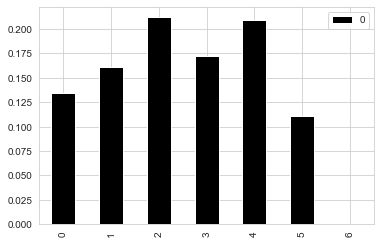

In [298]:
xgb=XGBClassifier(max_depth=3,learning_rate=0.01,test_size=0.25,n_estimators=500,n_jobs=1,random_state=5)
xgb.fit(X_train,y_train)
print(" Model Feature Importances = " ,xgb.feature_importances_)
feature_importances=pd.DataFrame(xgb.feature_importances_)
feature_importances.plot(kind='bar',color='black')
y_train_predict=xgb.predict(X_train)
y_predict=xgb.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

# -------------------------------------------------------------------------------------------------------------

# 3] Gradient Boosting Classifier

 Model Feature Importances =  [0.12038407 0.21038438 0.39228219 0.08056181 0.04090705 0.04729462
 0.10818588]
[[74  3]
 [ 2  0]]
Accuracy of Training =  100.0
Accuracy of Testing =   93.67088607594937
Precision score =  94.90339773484344
Recall score =  93.67088607594937
F1 score =  94.28311408951767
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.00      0.00      0.00         2

    accuracy                           0.94        79
   macro avg       0.49      0.48      0.48        79
weighted avg       0.95      0.94      0.94        79



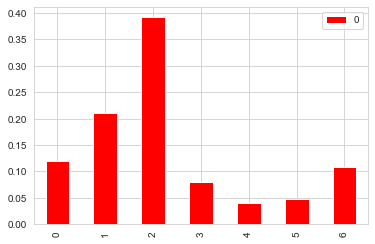

In [299]:
gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0,max_depth=3,random_state=5)
gb.fit(X_train,y_train)
print(" Model Feature Importances = " ,gb.feature_importances_)
feature_importances=pd.DataFrame(gb.feature_importances_)
feature_importances.plot(kind='bar',color='red')
y_train_predict=gb.predict(X_train)
y_predict=gb.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

# -------------------------------------------------------------------------------------------------------------

# 4] Decision Tree Classifier

Model Feature Importances =  [0.06445564 0.22695054 0.33732849 0.14537681 0.21786947 0.
 0.00801906]
[[72  5]
 [ 2  0]]
Accuracy of Training =  95.72649572649573
Accuracy of Testing =   91.13924050632912
Precision score =  94.83407458091003
Recall score =  91.13924050632912
F1 score =  92.94995389387208
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        77
           1       0.00      0.00      0.00         2

    accuracy                           0.91        79
   macro avg       0.49      0.47      0.48        79
weighted avg       0.95      0.91      0.93        79



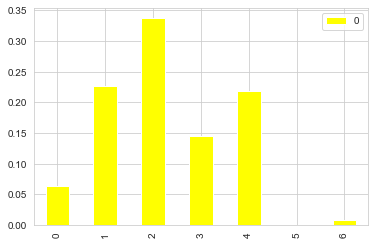

In [300]:
dt=DecisionTreeClassifier(splitter='best',random_state=5, min_samples_split=3,max_depth=4,
    min_samples_leaf=3,criterion='gini')
dt.fit(X_train,y_train)
print("Model Feature Importances = " ,dt.feature_importances_)
feature_importances=pd.DataFrame(dt.feature_importances_)
feature_importances.plot(kind='bar',color='yellow')
y_train_predict=dt.predict(X_train)
y_predict=dt.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

# -------------------------------------------------------------------------------------------------------------

# 5] Extra Trees Classifier

Model Feature Importances =  [0.09391058 0.12868981 0.0950539  0.10731477 0.20068331 0.13542504
 0.23892259]
[[77  0]
 [ 2  0]]
Accuracy of Training =  94.01709401709401
Accuracy of Testing =   97.46835443037975
Precision score =  95.00080115366126
Recall score =  97.46835443037975
F1 score =  96.21876014281078
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       0.00      0.00      0.00         2

    accuracy                           0.97        79
   macro avg       0.49      0.50      0.49        79
weighted avg       0.95      0.97      0.96        79



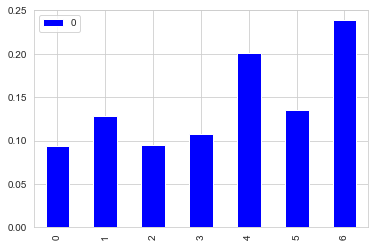

In [301]:
et=ExtraTreesClassifier(n_estimators=100,criterion='gini',random_state=5,max_depth=3,bootstrap=True)
et.fit(X_train,y_train)
print("Model Feature Importances = " ,et.feature_importances_)
feature_importances=pd.DataFrame(et.feature_importances_)
feature_importances.plot(kind='bar',color='blue')
y_train_predict=et.predict(X_train)
y_predict=et.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

# ---------------------------------------------------------------------------------------------------------------

# 6] Logistic Regression

In [302]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=5,C=2.0,multi_class='ovr')
lr.fit(X_train,y_train)

y_train_predict=lr.predict(X_train)
y_predict=lr.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True, margins_name='All')
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[77  0]
 [ 2  0]]
Accuracy of Training =  94.01709401709401
Accuracy of Testing =   97.46835443037975
Precision score =  95.00080115366126
Recall score =  97.46835443037975
F1 score =  96.21876014281078
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       0.00      0.00      0.00         2

    accuracy                           0.97        79
   macro avg       0.49      0.50      0.49        79
weighted avg       0.95      0.97      0.96        79



# <b> 4. Exporting the trained model with prediction capability for CHURN-FLAG, which can be highlighted in service applications to serve the customer better.</b>

## 1) Using joblib

## Save the model in a file 

#### 1) Random-Forest Classifier

In [303]:
from sklearn.externals import joblib
joblib.dump(rf, 'Telecom_churn_rf.ml')

['Telecom_churn_rf.ml']

#### 2) Logistic Regression

In [304]:
joblib.dump(lr,'Telecom_churn_lr.ml')

['Telecom_churn_lr.ml']

#### 3) Decision-Tree Classifier

In [305]:
joblib.dump(dt,'Telecom_churn_dt.ml')

['Telecom_churn_dt.ml']

#### 4) Extra-Trees Classifier

In [306]:
joblib.dump(et,'Telecom_churn_et.ml')

['Telecom_churn_et.ml']

#### 5) Gradient Boosting Classifier

In [307]:
joblib.dump(gb,'Telecom_churn_gb.ml')

['Telecom_churn_gb.ml']

#### 6) XGBoost Classifier

In [308]:
joblib.dump(xgb,'Telecom_churn_xgb.ml')

['Telecom_churn_xgb.ml']

## Load the model from the file 

#### 1) Random-Forest Classifier

In [309]:
from sklearn.externals import joblib

rf=joblib.load('Telecom_churn_rf.ml')

#### 2) Logistic Regression

In [310]:
from sklearn.externals import joblib

lr=joblib.load('Telecom_churn_lr.ml')

#### 3) Decision-Tree Classifier

In [311]:
dt=joblib.load('Telecom_churn_dt.ml')

#### 4) Extra-Trees Classifier

In [312]:
et=joblib.load('Telecom_churn_et.ml')

#### 5) Gradient Boosting Classifier

In [313]:
gb=joblib.load('Telecom_churn_gb.ml')

#### 6) XGBoost Classifier

In [314]:
xgb=joblib.load('Telecom_churn_xgb.ml')

## Use the loaded model to make predictions 

In [315]:
rf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [316]:
lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [317]:
dt.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [318]:
et.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [319]:
gb.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [320]:
xgb.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

## Predict the value 

In [321]:
rf.predict([[305.0,497.0,46.00,2.0,8.5,5.0,2.30]])

array([0])

In [322]:
lr.predict([[264.0,531.4,49.2,2.0,6.1,5.0,1.6]])

array([0])

In [323]:
dt.predict([[315.0,489.8,47.5,3.0,8.5,6.0,2.30]])

array([0])

In [324]:
et.predict([[244.0,486.4,50.4,2.0,6.1,7.0,1.65]])

array([0])

In [325]:
gb.predict([[303.0,510.0,44.76,2.0,7.1,5.0,1.92]])

array([0])

In [328]:
#xgb.predict([[303,510,44.76,2,7.1,5,1.92]])

## 2) Using pickle

In [329]:
import pickle

#### 1) Random-Forest Classifier

In [330]:
# Save the trained model as a pickle string 
saved_model=pickle.dumps(rf)

# Load the pickled model 
model_from_pickle=pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(X_test) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

#### 2) Logistic Regression

In [331]:
saved_model1=pickle.dumps(lr)
model_from_pickle1=pickle.loads(saved_model1) 
model_from_pickle1.predict(X_test) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 3) Decision-Tree Classifier

In [332]:
saved_model2=pickle.dumps(dt)
model_from_pickle2=pickle.loads(saved_model2) 
model_from_pickle2.predict(X_test) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

#### 4) Extra Trees Classifier

In [333]:
saved_model3=pickle.dumps(et)
model_from_pickle3=pickle.loads(saved_model3) 
model_from_pickle3.predict(X_test) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 5) Gradient-Boosting Classifier

In [334]:
saved_model4=pickle.dumps(gb)
model_from_pickle4=pickle.loads(saved_model4) 
model_from_pickle4.predict(X_test) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

#### 6) XGBoosting Classifier

In [335]:
saved_model5=pickle.dumps(xgb)
model_from_pickle5=pickle.loads(saved_model5) 
model_from_pickle5.predict(X_test) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])